<a href="https://colab.research.google.com/github/Swissbit92/MAS-Data-Science/blob/master/Kopie_von_CAS_Machine_Learning_Ramon_Zehnder_Semesterarbeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crypto Preiskurs Vorhersagung / Trader**

## **Einführung**

Es gibt kein "einziges" Machine-Learning-Modell, das für die Vorhersage von Aktienkursen am besten geeignet ist, da die Wahl des Modells von vielen Faktoren abhängt, wie zum Beispiel der Art der Daten, die verfügbar sind, und der spezifischen Anforderungen des Problems.

Einige der häufig verwendeten Methoden für die Vorhersage von Aktienkursen sind:

- Technische Analyse: Diese Methode nutzt statistische Indikatoren und Chartmuster, um die zukünftige Kursentwicklung vorherzusagen.

- Fundamentale Analyse: Diese Methode nutzt Finanzdaten, wie z.B. Gewinne, Umsätze, Vermögenswerte und Schulden, um die zukünftige Kursentwicklung vorherzusagen.

- Machine-Learning-Methoden: Diese Methoden nutzen komplexe Algorithmen, um Muster in historischen Daten zu erkennen und die zukünftige Kursentwicklung vorherzusagen. Beispiele für Machine-Learning-Methoden sind:

- Regressionsanalyse
-- Time-Series-Modelle (ARIMA, SARIMA, VAR, etc.)
-- Neural Networks (MLP, CNN, RNN, LSTM, etc.)

Es ist wichtig zu beachten, dass jede Methode ihre eigenen Vor- und Nachteile hat und dass es wichtig ist, das Problem und die Daten zu verstehen, um die passende Methode auszuwählen. Es wird oft empfohlen, mehrere Methoden zu testen und die Ergebnisse zu vergleichen, um die beste Methode für ein bestimmtes Problem zu finden.

Es gibt viele Anwendungen die sich mit Aktienkursen beschäftigen, wie zum Beispiel Trading-Roboter, die auf Machine-Learning-Methoden basieren, aber es ist wichtig zu betonen, dass es keine 100% Erfolgsgarantie gibt und es ist sehr schwierig, die zukünftige Entwicklung von Aktienkursen vorherzusagen.

_____________________________________________________________

"Stock Price Prediction using Machine Learning" von Harshvardhan Gupta auf Analytics Vidhya (https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/)

_______________________



**Anwendungsfall** 

- Ziel dieser Arbeit ist es ML und algorithmische Modelle zu bauen welche zur Bestimmung des Bitcoin Marktpreises verwendet werden kann.

- Es soll weiterhin zeigen, dass es mit einem humanen Aufwand möglich ist, Modelle zu erstellen wo man sonst kostenpflichtige Lizenzen kaufen muss (https://de.tradingview.com/gopro/?source=header_go_pro_button&feature=Buy%20Pro)

- Abschliessend will man herausfinden ob es möglich ist mittels dieser Modelle eine Preisstrategie zur erstellen die lukrativ traden können


**Rahmenbedingungen / Out of Scope**

- Im Rahmen dieser Arbeit benutzen wir nur Daten von Yahoo Finance (https://pypi.org/project/yfinance/). Diese sind öffentlich zugänglich und haben keine zeitlichen Limitierungen innerhalb des 1 Tages Intervalles. Da wir nicht versuchen, scalping zu betreiben / High frequency trading, ist dieser Intervall ausreichend.

- Weiterhin schliessen wir die Modelle nicht an eine live API an und/oder Live Daten (https://www.binance.com/en/binance-api)

- Es werden keine echten Trades durchgeführt, sondern nur Simulation aufgrund der historischen Daten.

**Ähnliche Arbeiten:**
- https://towardsdatascience.com/lstm-for-google-stock-price-prediction-e35f5cc84165
- https://www.datacamp.com/tutorial/lstm-python-stock-market
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

# **LSTM Model Approach 1 - Supervised DeepLearning with algorithmic Indicators**


## **Initializing the Frame Work**

In [ ]:
!pip install yfinance
!pip install pandas_ta
!pip install backtesting
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
from keras.utils.generic_utils import serialize_keras_object
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout, Input, TimeDistributed
import json 
import time
from datetime import datetime
from backtesting import Strategy
from backtesting import Backtest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

/usr/local/lib/python3.8/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


## **Data Analysis & Preprocessing**

**Beschreibung des Datensatzes**

In diesem Datensatz aus Yahoo Finance sehen wir die Preisdaten von Bitcoin (BTC-USD). Dabei handelt es sich um 1 Tages Periode Preisdaten.
https://pypi.org/project/yfinance/


Diese beinhalten folgende Kolumnen und Bedeutung:

- Date: Das Datum the Datenpunkts
- Open: Der Eröffnungspreis von Bitcoin während dieser Periode
- High: Der höchste Preis welcher während dieser Periode erreicht wurde
- Low: Der tiefste Preis welcher während dieser Periode erreicht wurde
- Close: Der Schlusspreis / Schliessungspreis am Ende der Periode
- Adj Close: Der angepasste Schlusspreis (für Dividenden und Splits) am Ende der Periode
- Volume: Das Volumen (Umschwung) von Bitcoin während der Periode.

Alle Preisdaten sind in diesem Datensatz in USD angegeben. in dieser Arbeit beziehen wir uns ausschliesslich auf diesen Datensatz. Die Preissdaten durch yfinance sind frei zugreifbar aber nur in der 1 Tages Periode (bei kleineren Perioden bestehen Limitierungen). Deshalb wird auch diese Periodendauer sich durch diese Arbeit ziehen. 

In [ ]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2022, 12, 31)
interval = '1d'
crypto_asset = 'BTC-USD'

#loading the data and removing empty value rows / 'Na'
df = yf.download(crypto_asset, start=start_date, end=end_date, interval=interval)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


Hier fügen wir für das Modell einige Indikatoren hinzu um die Genauigkeit des Modells potentiell zu erhöhen. 

1. `Wir benutzen die bekanntesten / Standard MA Indikatoren (Moving Averages)` = Moving Averages (MA) sind ein wichtiges technisches Analysewerkzeug, das Händlern und Investoren dabei hilft, die Richtung und Stärke eines Trends zu bestimmen. Sie berechnen den durchschnittlichen Preis eines Vermögenswerts über einen bestimmten Zeitraum. Es gibt verschiedene Arten von gleitenden Durchschnitten, wie z.B. Simple Moving Average (SMA) und Exponential Moving Average (EMA). Exponential Moving Average (EMA) ist eine andere Art von gleitendem Durchschnitt, der die jüngsten Preise stärker gewichtet, um auf kurzfristige Änderungen schneller zu reagieren.

2. `Slope Indikatoren` = Im Zusammenhang mit technischen Indikatoren in der technischen Analyse (TA) bezieht sich "slope" auf die Steigung einer Linie. Eine positive Steigung bedeutet, dass die Linie nach oben geneigt ist und eine negative Steigung bedeutet, dass die Linie nach unten geneigt ist. Der Slope eines Indikators kann verwendet werden, um die Richtung eines Trends zu bestimmen und potenzielle Wendepunkte im Preisverlauf zu identifizieren.

3. `Moving Average Convergence Divergence (MACD)` = MACD ist ein technischer Indikator, der entwickelt wurde, um Trends und potenzielle Wendepunkte im Preisverlauf zu identifizieren. Es besteht aus drei Komponenten: einem schnellen gleitenden Durchschnitt (EMA), einem langsamen gleitenden Durchschnitt (EMA) und einer Signallinie (meistens eine 9-Perioden-EMA des MACD-Wertes).

In [ ]:
#adding a couple of indicators to the dataframe from the pandas_ta library:
#https://pypi.org/project/pandas-ta/
df['RSI'] = ta.rsi(df.Close, length=15)
df['MA20'] = ta.sma(df.Close, length=20)
df['MA50'] = ta.sma(df.Close, length=50)
df['MA100'] = ta.sma(df.Close, lenght=100)
df['MA200'] = ta.sma(df.Close, length=200)

#---------------------------------------------------------------

#adding the MACD indicator to the data frame
# Calculate the 12-day and 26-day EMA
df_12EMA = df["Close"].ewm(span=12, adjust=False).mean()
df_26EMA = df["Close"].ewm(span=26, adjust=False).mean()

# Calculate the MACD and adding it to the data frame
df["MACD"] = df_12EMA - df_26EMA

#---------------------------------------------------------------

#Creating slope columns to identify the current up or down trend based on the indicators
from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

n_rollings = 6

#executing the slope function for the individual indicators and adding them as new columns
df['slopeMA20'] = df['MA20'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['slopeMA50'] = df['MA50'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['slopeMA100'] = df['MA100'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['slopeMA200'] = df['MA200'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=n_rollings).apply(get_slope, raw=True) 

#---------------------------------------------------------------

#Adding a next close value & value change, based on previous history
df['Input_Next_Close'] = df['Adj Close'].shift(-1)
df['Input_ValueChange'] = df['Adj Close'] - df.Open
df['Input_ValueChange'] = df['Input_ValueChange'].shift(-1)

#cleaning the data of unneeded columns & empty / 'Na' values
#test_data = df.drop(columns=['Open', 'Close','Adj Close', 'High', 'Low'])
df.dropna(inplace=True)

df.isna().sum()

#---------------------------------------------------------------

#defining the UP or DOWN Trend based on indicators = RSI Indicator
def Signals(x):
  #1 Indicates and DOWN Trend in Price
  if x.MA20 < x.MA50 and x.RSI < 65:
    return +1
  #2 indicates and UP trend in price
  elif x.MA20 > x.MA50 and x.RSI > 35:
    return +2
  #0 means the indication / trend is unclear with given indicators analysis
  else:
    return 0

df['Input_Trend'] = df.apply(Signals, axis=1)

#Checking the distribution of the "Trends"
print(df['Input_Trend'].value_counts() *100/df['Input_Trend'].count())

2    52.956189
1    45.044662
0     1.999149
Name: Input_Trend, dtype: float64


Hier überprüfen wir noch ob die TrendSignale = "Input_Trend", eine gute Verteile aufweisen. Da wir eine fast 50 zu 50 Verteilung haben, sehen wir das mit diesen Parametern Peishistorie akkurat auf Aufwärtstrends = 2, und Abwärtstrend = 1 verteilen konnten 

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MA20,MA50,MA100,MA200,MACD,slopeMA20,slopeMA50,slopeMA100,slopeMA200,RSISlope,Input_Next_Close,Input_ValueChange,Input_Trend
Date,,,,,,,,,,,,,,,,,,,,
2016-07-23 00:00:00+00:00,650.726013,656.366028,648.523987,655.556030,655.556030,69532200,49.515944,662.505209,658.615043,664.440112,485.695454,2.910123,-0.625865,2.431547,0.829375,1.146263,-1.130081,661.284973,5.875000,2
2016-07-24 00:00:00+00:00,655.409973,663.109985,652.793030,661.284973,661.284973,118184000,51.078768,661.386359,660.386202,664.760809,486.856354,2.626362,-1.061468,2.196423,0.342286,1.135523,-0.729939,654.096985,-7.166016,2
2016-07-25 00:00:00+00:00,661.263000,661.828003,653.395020,654.096985,654.096985,78176496,49.038041,660.559857,661.968602,663.845007,487.836599,1.800711,-1.101031,1.955976,-0.100095,1.109325,-0.468471,651.783997,-2.442017,1
2016-07-26 00:00:00+00:00,654.226013,656.224976,645.879028,651.783997,651.783997,225135008,48.371747,659.282507,663.293542,662.946704,488.829369,0.948801,-1.073782,1.723056,-0.429350,1.075313,-0.387584,654.351990,2.724976,1
2016-07-27 00:00:00+00:00,651.627014,657.455994,648.447021,654.351990,654.351990,147460992,49.192931,659.972006,664.848643,660.436005,489.863074,0.475392,-0.683932,1.583489,-0.710645,1.051714,-0.012330,655.034973,0.542969,1


## **Plotting the Dataframe**

Wir plotten das Datenset mit den MA's um zu sehen ob das Datenset immer noch passt / Die Preishistory Sinn macht. Wir benutzen wür den Plot die `"plotly.graph_objects"` https://plotly.com/python/graph-objects/

`Plotly.graph_objects` ist eine Bibliothek in Python, die es ermöglicht, interaktive Plots zu erstellen und zu visualisieren. Es bietet eine Vielzahl von Funktionen, die es Benutzern ermöglichen, komplexe Daten einfach darzustellen und zu analysieren. Einige Gründe, warum man plotly.graph_objects verwenden sollte, sind:

- **`Interaktivität:`** Plotly.graph_objects ermöglicht es Benutzern, Plots zu zoomen, zu drehen, Datenpunkte anzuklicken und vieles mehr, um die Daten aus verschiedenen Perspektiven zu betrachten.

- `Benutzerfreundlichkeit:` Die Bibliothek ist einfach zu verwenden und bietet eine intuitive Syntax, die es Benutzern ermöglicht, schnell Plots zu erstellen und zu personalisieren.

- `Kompatibilität:` Plotly.graph_objects ist kompatibel mit vielen anderen Bibliotheken wie Pandas und Numpy und ermöglicht es Benutzern, Daten aus diesen Bibliotheken zu verwenden, um Plots zu erstellen.

- `Anpassbarkeit:` Plotly.graph_objects bietet eine Vielzahl von Optionen für die Anpassung von Plots, wie z.B. Farben, Schriftarten, Legenden und vieles mehr.

In [ ]:
#Plotting the Price graph as CandleSticks and the Moving averages as lines
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open = df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close']),
                      go.Scatter(x=df.index, y=df.MA20, line=dict(color='yellow', width=1), name="MA20"),
                      go.Scatter(x=df.index, y=df.MA50, line=dict(color='violet', width=1), name="MA50"),
                      go.Scatter(x=df.index, y=df.MA100, line=dict(color='blue', width=1), name="MA100"),
                      go.Scatter(x=df.index, y=df.MA200, line=dict(color='red', width=1), name="MA200")])

fig.show()

<ipython-input-10-f56f48f1e44f>:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



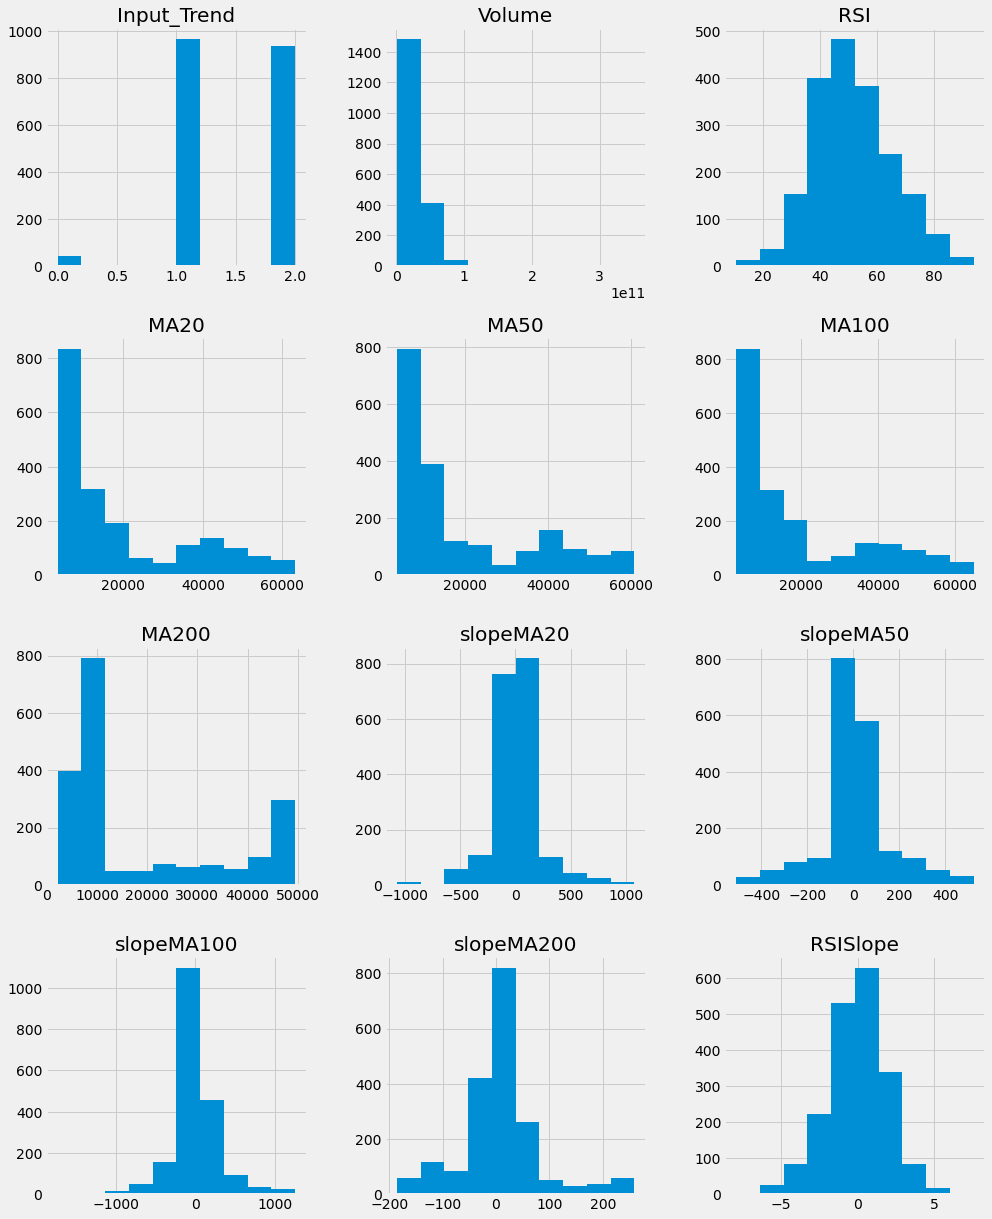

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_columns = ['Input_Trend', 'Volume', 'RSI', 'MA20', 'MA50', 'MA100', 'MA200', 'slopeMA20',
              'slopeMA50', 'slopeMA100', 'slopeMA200', 'RSISlope']
df_model= df[df_columns] 
df_model.hist(ax = ax)
plt.show()

## **Kreierung des LSTM Models**

In diesem Abschnitt werden die Parameter für das Model erstellt. Mehrere Paramter sind felxibel justierbar um die Trainingsdaten für das Model anzupassen: 


"target_columns" = Die Anzahl Kolumnen in dem Data frame welche in das model für das training berücksichtigen sollen. 

"lookingback_days" = Die Anzahl der Tage / die Preishistorie welche für das Model für das Training zur Verfügung gestellt werden soll. Ich habe hier mehrere Skalierungen in der Range von 1 bis 500 versucht. Die 

"df_new" = Die beiden Kolumnen 'Close' und 'Volume sind für das Model nicht relevant / Die beiden Kolumnen sind nicht relevant für die Preishistorie.

Hier ist es sehr wichtig X und Y die richtigen Dimensionen hinzuzufügen, das sonst das LSTM Modell nicht funktioniert.

In [ ]:
#Applying a scaler to the data to prepare it for the model to a numpy array. Setting the range to 0 to 1
attributes = ['Close', 'RSI',	'MA20',	'MA50',	'MA100',	'MA200',	'MACD',	'slopeMA20',	'slopeMA50',	'slopeMA100',	'slopeMA200',	'RSISlope', 'Input_Next_Close',	'Input_ValueChange',	'Input_Trend']
df_new = df[attributes]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_new)

#Create the prediction column for the next days price
X = []
#The data can look back 'n' days for the prediction of the next price
lookingback_days = 30
#The range is defined by the amount of columns to be added to the X data set
target_columns = 12
for j in range(target_columns):
  X.append([])
  for i in range(lookingback_days, scaled_data.shape[0]):
    X[j].append(scaled_data[i - lookingback_days: i, j])

X = np.moveaxis(X, [0], [2])
X = np.array(X)
#Assigning the 'Next_close' column, which is -3 from the last column
yi = np.array(scaled_data[lookingback_days:, -3])
#creating a 2 dimensional array out of the 1 dimensional array
y = np.reshape(yi, (len(yi), 1))

print(yi)
print(X.shape)
print(y.shape)
print(y)
df_new.head()

[0.00053641 0.00048817 0.00045205 ... 0.23881318 0.24015264 0.23955944]
(2321, 30, 12)
(2321, 1)
[[0.00053641]
 [0.00048817]
 [0.00045205]
 ...
 [0.23881318]
 [0.24015264]
 [0.23955944]]


,Close,RSI,MA20,MA50,MA100,MA200,MACD,slopeMA20,slopeMA50,slopeMA100,slopeMA200,RSISlope,Input_Next_Close,Input_ValueChange,Input_Trend
Date,,,,,,,,,,,,,,,
2016-07-23 00:00:00+00:00,655.556030,49.515944,662.505209,658.615043,664.440112,485.695454,2.910123,-0.625865,2.431547,0.829375,1.146263,-1.130081,661.284973,5.875000,2
2016-07-24 00:00:00+00:00,661.284973,51.078768,661.386359,660.386202,664.760809,486.856354,2.626362,-1.061468,2.196423,0.342286,1.135523,-0.729939,654.096985,-7.166016,2
2016-07-25 00:00:00+00:00,654.096985,49.038041,660.559857,661.968602,663.845007,487.836599,1.800711,-1.101031,1.955976,-0.100095,1.109325,-0.468471,651.783997,-2.442017,1
2016-07-26 00:00:00+00:00,651.783997,48.371747,659.282507,663.293542,662.946704,488.829369,0.948801,-1.073782,1.723056,-0.429350,1.075313,-0.387584,654.351990,2.724976,1
2016-07-27 00:00:00+00:00,654.351990,49.192931,659.972006,664.848643,660.436005,489.863074,0.475392,-0.683932,1.583489,-0.710645,1.051714,-0.012330,655.034973,0.542969,1


**Erstellung de LSTM Models**

**Für das Model benutzen wir das LSTM Modell:**

LSTM (Long Short-Term Memory) ist ein spezielles Art von Recurrent Neural Network (RNN), das besonders gut für die Vorhersage von zeitreihenbasierten Daten geeignet ist. Es gibt mehrere Gründe, warum man für time series das LSTM Modell verwenden sollte:

- Langzeitabhängigkeit: Zeitreihen haben oft langfristige Abhängigkeiten, die normalerweise von traditionellen statistischen Modellen nicht erfasst werden können. LSTMs sind in der Lage, diese Abhängigkeiten zu erfassen, indem sie die Informationen über einen längeren Zeitraum speichern und verarbeiten.

- Nonsequential Data: LSTM kann auch verwendet werden, um nicht-sequentielle Daten zu verarbeiten, wie z.B. Bild- oder Sprachdaten.

- Robustheit: LSTMs sind robust gegenüber lokalen Optimierungen und können daher in vielen Fällen bessere Ergebnisse erzielen als andere Modelle.


**Parameter**:

- `MSE` = Der MSE (Mean Squared Error) ist eine häufig verwendete Metrik zur Bewertung der Vorhersagegenauigkeit von Modellen. Es berechnet den durchschnittlichen quadratischen Fehler zwischen den vorhergesagten und den tatsächlichen Werten.
- `epochs` = die Anzahl der Durchläufe, die das Modell durch die Trainingsdaten macht, um die Gewichte des Modells zu optimieren. 
- `batch_size` = die Anzahl der Beobachtungen, die pro Durchlauf durch das Modell verarbeitet werden. 
- `distribution` = Verteilung der Test und Train Daten für das Modell



In [ ]:
from keras import Model
from keras.layers.core.activation import Activation
# disribute the dat into the test and training sets
distribution = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[: distribution], X[distribution :], y[: distribution], y[distribution :]

In [ ]:
# Shape equals to the numnber of backcandles and number of columns = target columns
Input_LSTM = Input(shape=(lookingback_days, target_columns), name='Input_LSTM')
Layers = LSTM(150, name='1st_layer')(Input_LSTM)
Layers = Dense(1, name='2nd_layer')(Layers)
Outcome = Activation('linear', name='outcome')(Layers)
model = Model(inputs=Input_LSTM, outputs=Outcome)

# creating the model / training it. the 'adam' optimizer is most commonly used (0.001) is the default
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse',
                 #adds a metric that shows how many results are match to the real data / it shows how accurate the model is
                 metrics=['accuracy', 'mse'])

## Training the model ##
#batch size defines the amount of 'samples' being used to train the model before goin back to the data and adapting it / starting a new epoch with new batch
#the epochs define how many iterations the model will train with samples attempting to improve
model.fit(x = X_train, y = y_train, batch_size=32, epochs=60, shuffle= True, )

#in the result you can see that the 'accuracy' is improving up to a certain point. But not necessarily always. It can also decrease again.


Epoch 1/60
58/58 [==============================] - 3s 28ms/step - loss: 0.0126 - accuracy: 5.3879e-04 - mse: 0.0126
Epoch 2/60
58/58 [==============================] - 1s 26ms/step - loss: 0.0033 - accuracy: 5.3879e-04 - mse: 0.0033
Epoch 3/60
58/58 [==============================] - 1s 25ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - mse: 0.0036
Epoch 4/60
58/58 [==============================] - 1s 25ms/step - loss: 0.0033 - accuracy: 5.3879e-04 - mse: 0.0033
Epoch 5/60
58/58 [==============================] - 2s 26ms/step - loss: 0.0033 - accuracy: 5.3879e-04 - mse: 0.0033
Epoch 6/60
58/58 [==============================] - 1s 25ms/step - loss: 0.0032 - accuracy: 5.3879e-04 - mse: 0.0032
Epoch 7/60
58/58 [==============================] - 2s 29ms/step - loss: 0.0031 - accuracy: 0.0011 - mse: 0.0031
Epoch 8/60
58/58 [==============================] - 3s 50ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - mse: 0.0036
Epoch 9/60
58/58 [==============================] - 1s 25ms/step - l

`Bewertung:` 

Hier sieht man dass wir eine sehr niedrigen "loss" mit dem gewählten Model aufweisen. Wenn man die Batch Size anpasst, fällt auf, dass die Wahl der Size nur geringfügige Auswikrungen auf die "accuracy" und den "Loss" hat. Die Wahl der Epochen war eine weitere Methode um das Model zu verbessern. Es war eine Verbesserung des Models ersichtlich bis "60", danach ist keine sichtbare Verbesserung des "Loss" ersichtlich. 


Interessant ist hier das die accuracy sehr sehr schlecht ist. auch nach weiteren Anpassungen ist es mir nicht gelungen diese accuracy zu erhöhen.
Es scheint im ersten Blick das, dass Model nicht in der Lage ist die nächsten Preise zu bestimmen. 

### **Model Speichern**

Speichern des Models in die Disk falls es später wieder benutzen werden soll.

In [ ]:
# Save the model to disk
model.save("lstm_model_withIndicators.h5")

## **Evaluierung des Models**

In [ ]:
from keras.models import load_model
# load model
loaded_model = load_model("lstm_model_withIndicators.h5")

Zur genaueren Untersuchung werden die Test und predicted Werte ausgegeben. 
Hier sieht man das wir tatsächlich die genauen Werte eigentlich nie treffen. 

In [ ]:
y_pred = model.predict(X_test)
for i in range(20):
  print(y_pred[i], y_test[i])

12/12 [==============================] - 0s 10ms/step
[0.69247127] [0.71737635]
[0.67131984] [0.72880014]
[0.6801639] [0.67662257]
[0.6873868] [0.6746843]
[0.66081667] [0.71014499]
[0.65204287] [0.691029]
[0.6695754] [0.66831143]
[0.6590548] [0.67835046]
[0.64770126] [0.6761496]
[0.6542156] [0.6788395]
[0.64852446] [0.7107643]
[0.6450123] [0.70598099]
[0.67323714] [0.73945351]
[0.67881554] [0.74003812]
[0.70445144] [0.73394707]
[0.71365994] [0.73984127]
[0.71147037] [0.73721601]
[0.7129695] [0.68984024]
[0.714694] [0.6720773]
[0.6796217] [0.68346361]


So sieht entsprechend auch die accuracy nicht gut aus. 

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Compare the predictions with the actual values
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

12/12 [==============================] - 0s 9ms/step
Accuracy: 0.0


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error:', mse)

12/12 [==============================] - 0s 11ms/step
Mean Squared Error: 0.001754067371749234


In [ ]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose= 0)
print('Accuracy on training data: {}% \n Error on training data: {}'\
      .format(scores[1], 1 - scores[1]))

48/48 [==============================] - 0s 9ms/step
Accuracy on training data: 0.000654450268484652% 
 Error on training data: 0.9993455497315153


## **Visualisierung des Modells**

In dieser Version des LSTM Models wird klar ersichtlich, dass obwohl die Parameter möglichst optimiert wurden, die Genauigkeit des des Models abnimmt gegenüber eines einfachen Modelles, dass nur den "Close" Preis nutzt.

Man könnte hier argumentieren, dass es an einem overfitting des models liegt.

Trotzdem sieht man hier im plot ganz deutlich, dass die Daten den realen Preisverlauf folgen. Das Model ist trotzdem "Genau" im Bezug auf eine Annäherung. 

15/15 [==============================] - 0s 9ms/step


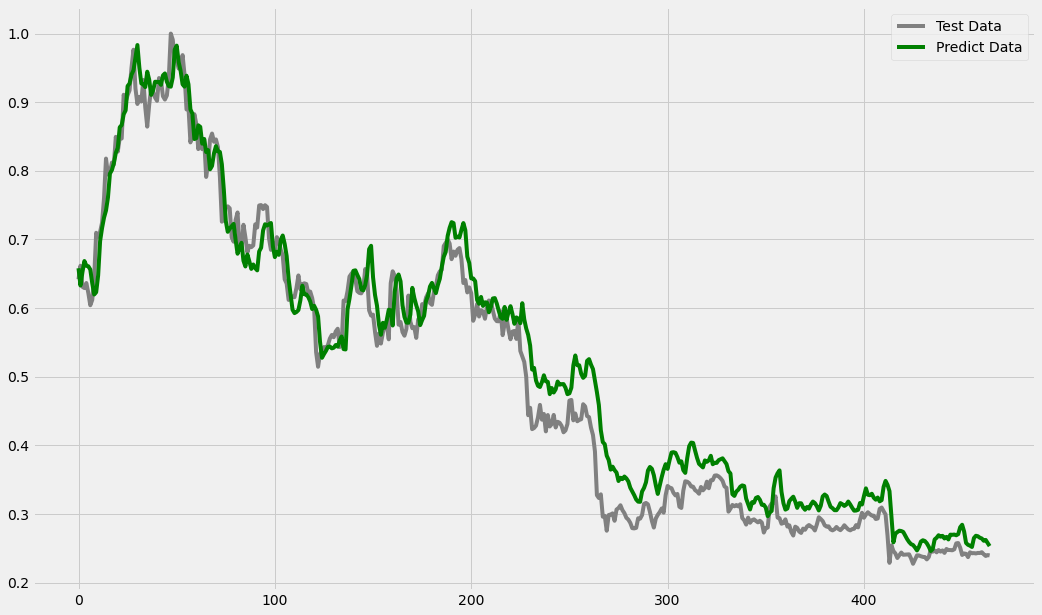

In [ ]:
y_pred = loaded_model.predict(X_test)
plt.figure(figsize = (16, 10))
plt.plot(y_test, color = 'grey', label='Test Data')
plt.plot(y_pred, color = 'green', label='Predict Data')
plt.legend()
plt.show()

`Bewertung:`

Im Plot sieht man eine sehr gutes alignment des predicted Preises and die Test/echten Daten. Also warum ist die "accuracy" trotzdem so niedrig? Eine erste Annahme ist schon in diesem Diagramm ersichtlich. Auch wenn der Preisverlauf sehr nahe an den realen Daten ist, ist es doch keine exakte Übereinstimmung / es gibt nur wenige Kontaktpunkte wi sich die Preise exakt überschneiden. 

Um ein [Overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) auszuschliessen versuchen wir das Model nochmal zu bauen aber mit einem anderen Ansatz und nur durch Benutzung des "Close" Preises.

### **Das Problem**

Weil wir immer nur einen neuen Preis mit dem Model anfragen (the next closing price) ist auch wenn der predicted Wert falsch ist, ist der Offest nur gleich 1. Anders gesagt auch wenn der predicted Price nicht dem realen entpsicht, hat das Model mit dem nächste Preis wieder eine chance sich anzunähren. 

Um dieses Problem zu veranschaulichen wird das Programm nochmal gestarted aber es wir als Label versucht den `ValueChange` vorher zu sagen. 

Dazu wird der Parameter: `"yi = np.array(scaled_data[lookingback_days:, -2])"` von -3 zu -2 was der entsprechenden Kolumne entspricht. 

In [ ]:
#Applying a scaler to the data to prepare it for the model to a numpy array. Setting the range to 0 to 1
attributes = ['Close', 'RSI',	'MA20',	'MA50',	'MA100',	'MA200',	'MACD',	'slopeMA20',	'slopeMA50',	'slopeMA100',	'slopeMA200',	'RSISlope', 'Input_Next_Close',	'Input_ValueChange',	'Input_Trend']
df_new = df[attributes]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_new)

#Create the prediction column for the next days price
X = []
#The data can look back 'n' days for the prediction of the next price
lookingback_days = 30
#The range is defined by the amount of columns to be added to the X data set
target_columns = 12
for j in range(target_columns):
  X.append([])
  for i in range(lookingback_days, scaled_data.shape[0]):
    X[j].append(scaled_data[i - lookingback_days: i, j])

X = np.moveaxis(X, [0], [2])
X = np.array(X)
#Assigning the 'Input_valueChange' column, which is -2 from the last column
yi = np.array(scaled_data[lookingback_days:, -2])
#creating a 2 dimensional array out of the 1 dimensional array
y = np.reshape(yi, (len(yi), 1))

print(yi)
print(X.shape)
print(y.shape)
print(y)
df_new.head()

[0.50832505 0.50833352 0.50838804 ... 0.49753601 0.51460297 0.50594579]
(2321, 30, 12)
(2321, 1)
[[0.50832505]
 [0.50833352]
 [0.50838804]
 ...
 [0.49753601]
 [0.51460297]
 [0.50594579]]


,Close,RSI,MA20,MA50,MA100,MA200,MACD,slopeMA20,slopeMA50,slopeMA100,slopeMA200,RSISlope,Input_Next_Close,Input_ValueChange,Input_Trend
Date,,,,,,,,,,,,,,,
2016-07-23 00:00:00+00:00,655.556030,49.515944,662.505209,658.615043,664.440112,485.695454,2.910123,-0.625865,2.431547,0.829375,1.146263,-1.130081,661.284973,5.875000,2
2016-07-24 00:00:00+00:00,661.284973,51.078768,661.386359,660.386202,664.760809,486.856354,2.626362,-1.061468,2.196423,0.342286,1.135523,-0.729939,654.096985,-7.166016,2
2016-07-25 00:00:00+00:00,654.096985,49.038041,660.559857,661.968602,663.845007,487.836599,1.800711,-1.101031,1.955976,-0.100095,1.109325,-0.468471,651.783997,-2.442017,1
2016-07-26 00:00:00+00:00,651.783997,48.371747,659.282507,663.293542,662.946704,488.829369,0.948801,-1.073782,1.723056,-0.429350,1.075313,-0.387584,654.351990,2.724976,1
2016-07-27 00:00:00+00:00,654.351990,49.192931,659.972006,664.848643,660.436005,489.863074,0.475392,-0.683932,1.583489,-0.710645,1.051714,-0.012330,655.034973,0.542969,1


In [ ]:
from keras import Model
from keras.layers.core.activation import Activation
# disribute the dat into the test and training sets
distribution = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[: distribution], X[distribution :], y[: distribution], y[distribution :]

**Ab hier zuerst nochmal das LSTM model.fit in Approach laufen lassen falls es noch nicht gespeichert wurde.**

In [ ]:
from keras.models import load_model
# load model
loaded_model = load_model("lstm_model_Problem.h5")

15/15 [==============================] - 0s 10ms/step


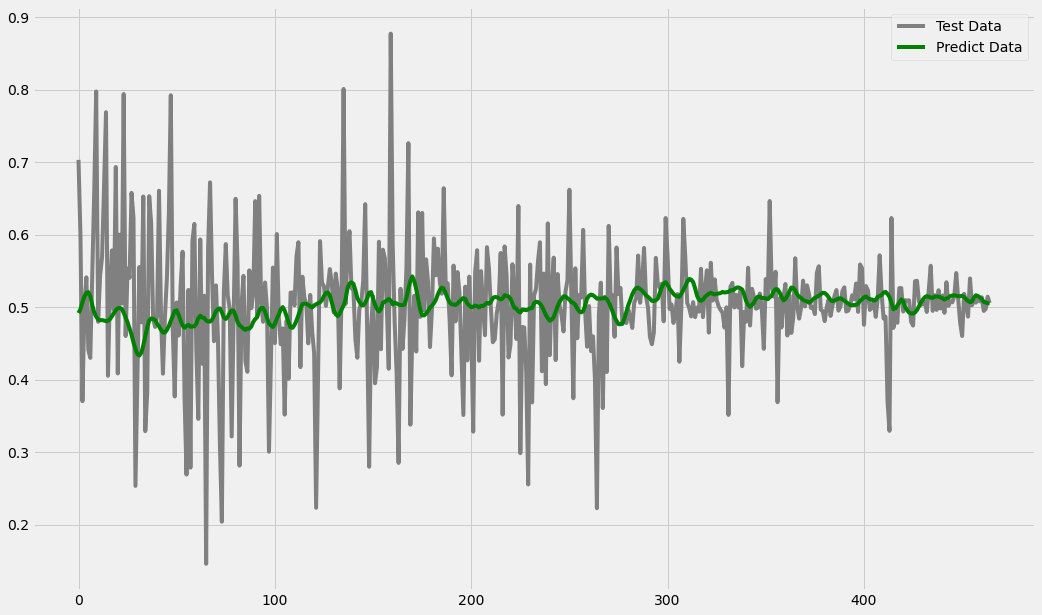

In [ ]:
y_pred = loaded_model.predict(X_test)
plt.figure(figsize = (16, 10))
plt.plot(y_test, color = 'grey', label='Test Data')
plt.plot(y_pred, color = 'green', label='Predict Data')
plt.legend()
plt.show()

Hier sehen wir die Realität / das Limit eines einfachen LSTM Models. Die ValueChanges werden nicht vorhergesagt. Nur die Richtung.

# **LSTM Model Approach 2 - Supervised DeepLearning with Price Information only**

In einem 2ten Ansatz, wird versucht das Model simnpler zu gestalten, indem nur die Preisinformation in das Model eingepflegt werden. Das sollte das Problem mit dem Overfitting lösen. Zusätzlich fügen wir auch noch `Dropout Layers` hinzu um die Chance auf overfitting zu verringern.

`Dropout` = Dropout ist eine Technik zur Verringerung von Überanpassung (Overfitting) in neuronalen Netzen, einschließlich LSTMs. Es besteht darin, zufällig ausgewählte Neuronen während des Trainings auszuschalten, um das Modell dazu zu bringen, sich auf verschiedene Teilmengen der Eingaben anzupassen und nicht nur auf bestimmte Neuronen oder Eigenschaften der Eingaben.

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Get historical data for Bitcoin
btc = yf.Ticker("BTC-USD").history(period="4y")

# Create a new dataframe with only the "Close" column
data = btc[['Close']]

# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

# Convert an array of values into a dataset matrix
look_back = 10
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape the data for LSTM
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape the input data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(150, input_shape=(1, look_back), activation='relu'))
# adding a Dropout layer to address possible overfitting
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(trainX, trainY, epochs=80, batch_size=10, verbose=2)

# Make predictions on the test data
testPredict = model.predict(testX)

# Inverse the scaling on the predictions
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate the root mean squared error (RMSE)
testScore = np.sqrt(np.mean((testPredict - testY[0]) ** 2))
print(f'Test Score: {testScore}')

Epoch 1/80
116/116 - 3s - loss: 0.0221 - accuracy: 0.0017 - 3s/epoch - 26ms/step
Epoch 2/80
116/116 - 0s - loss: 0.0027 - accuracy: 0.0017 - 231ms/epoch - 2ms/step
Epoch 3/80
116/116 - 0s - loss: 0.0022 - accuracy: 0.0017 - 214ms/epoch - 2ms/step
Epoch 4/80
116/116 - 0s - loss: 0.0023 - accuracy: 0.0017 - 228ms/epoch - 2ms/step
Epoch 5/80
116/116 - 0s - loss: 0.0023 - accuracy: 0.0017 - 252ms/epoch - 2ms/step
Epoch 6/80
116/116 - 0s - loss: 0.0021 - accuracy: 0.0017 - 209ms/epoch - 2ms/step
Epoch 7/80
116/116 - 0s - loss: 0.0019 - accuracy: 0.0017 - 218ms/epoch - 2ms/step
Epoch 8/80
116/116 - 0s - loss: 0.0022 - accuracy: 0.0017 - 239ms/epoch - 2ms/step
Epoch 9/80
116/116 - 0s - loss: 0.0021 - accuracy: 0.0017 - 222ms/epoch - 2ms/step
Epoch 10/80
116/116 - 0s - loss: 0.0018 - accuracy: 0.0017 - 238ms/epoch - 2ms/step
Epoch 11/80
116/116 - 0s - loss: 0.0018 - accuracy: 0.0017 - 224ms/epoch - 2ms/step
Epoch 12/80
116/116 - 0s - loss: 0.0017 - accuracy: 0.0017 - 225ms/epoch - 2ms/step
Epo

Eine spezifischen Aktivierungsfunktionen wie `"relu"` oder` "sigmoid"` haben unterschiedliche Eigenschaften, die für bestimmte Arten von Problemen geeignet sind.` "Relu"` ist hier die passenderende Funktion da es in tiefen Netzwerken verwendet wird, wo Bsp. negative Werte auf 0 setzt. `"Sigmoid"` hingegen eignet sich besser für Probleme, bei denen die Ausgabe zwischen 0 und 1 liegen soll, da es eine S-förmige Aktivierungsfunktion hat.

"Activation Functions in Neural Networks" von Jason Brownlee auf Machine Learning Mastery (https://machinelearningmastery.com/activation-functions-for-deep-learning-neural-networks/)



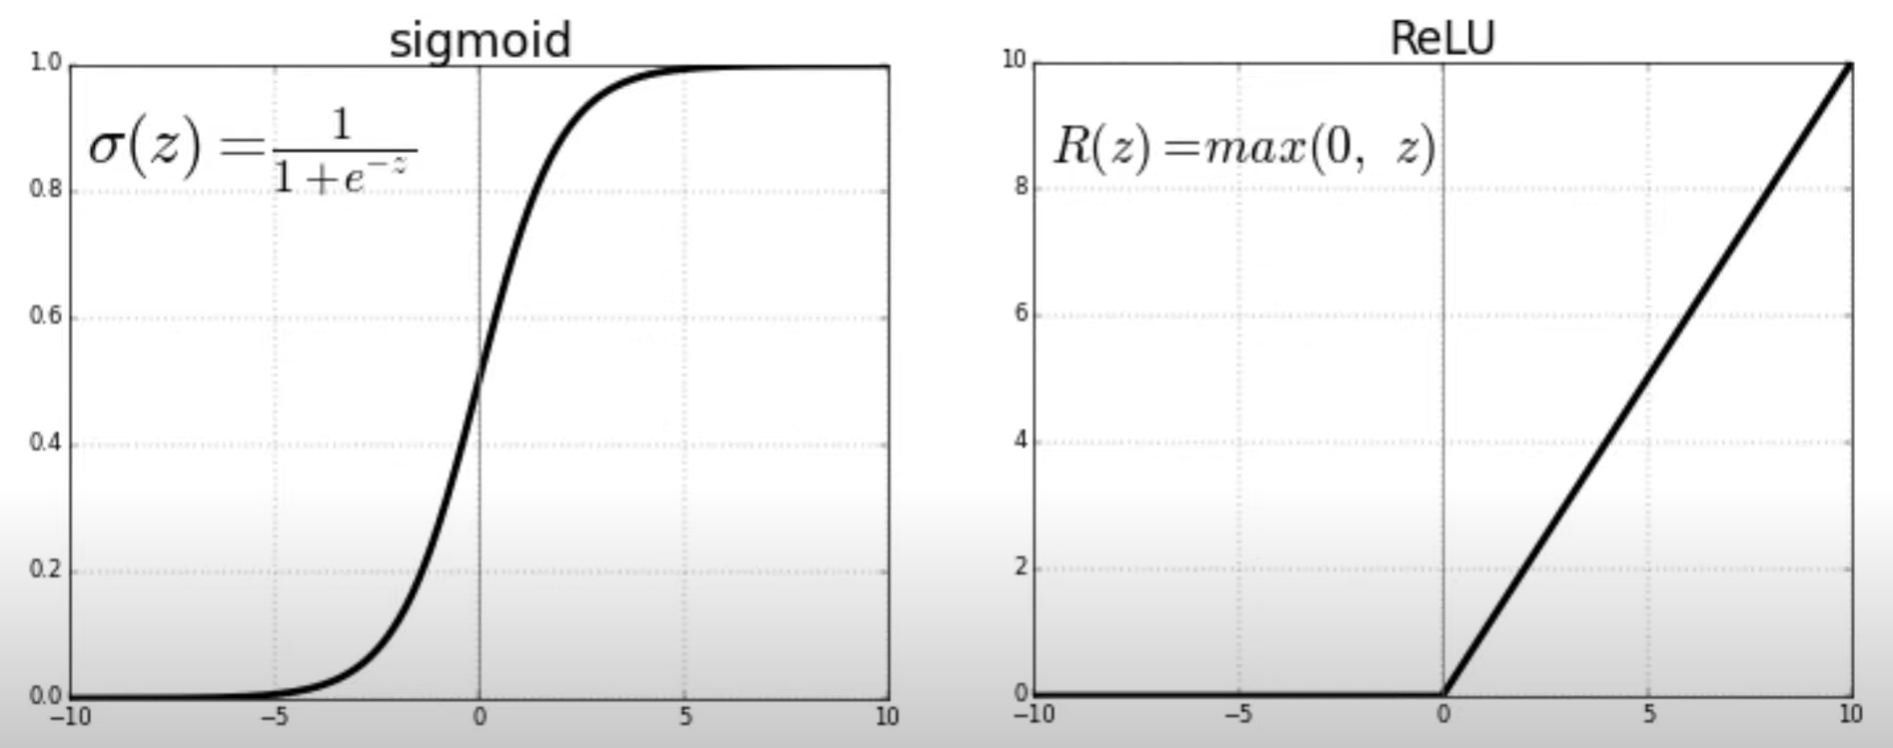

## **Evaluierung des Modells**

Auch hier erhalten wir jedoch immer noch eine unbrauchbare accuracy von unter 0.01%

In [ ]:
pred_train = model.predict(trainX)
scores = model.evaluate(trainX, trainY, verbose= 0)
print('Accuracy on training data: {}% \n Error on training data: {}'\
      .format(scores[1], 1 - scores[1]))

37/37 [==============================] - 0s 1ms/step
Accuracy on training data: 0.0017271157121285796% 
 Error on training data: 0.9982728842878714


## **Modell speichern bzw. Laden**

In [ ]:
# Save the model to disk
model.save("lstm_model_Version2.2.h5")

In [ ]:
from keras.models import load_model
# load model
loaded_model = load_model("lstm_model_Version2.2.h5")

## **Visualisierung des Models**

In diesem plot wird allerdings ersichtlich, dass trotz der schlechten accuracy die geschätzten (predicted) Werte nun noch näher an den realen Daten liegen. Es hat eine Annäherung stattgefunden. 

37/37 [==============================] - 0s 2ms/step


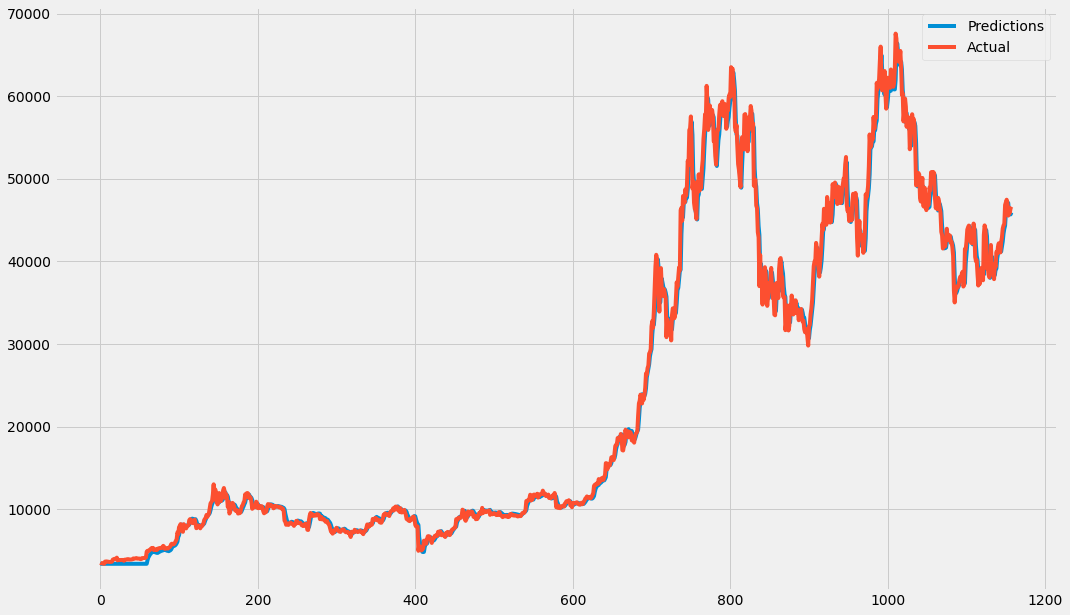

In [ ]:
# Make predictions on the training data
trainPredict = model.predict(trainX)

# Inverse the scaling on the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_plot = scaler.inverse_transform([trainY])

# Plot the predictions on the training data
fig = plt.figure(figsize = (16,10))
plt.plot(trainPredict, label='Predictions')
plt.plot(trainY_plot[0], label='Actual')
plt.legend()
plt.show()

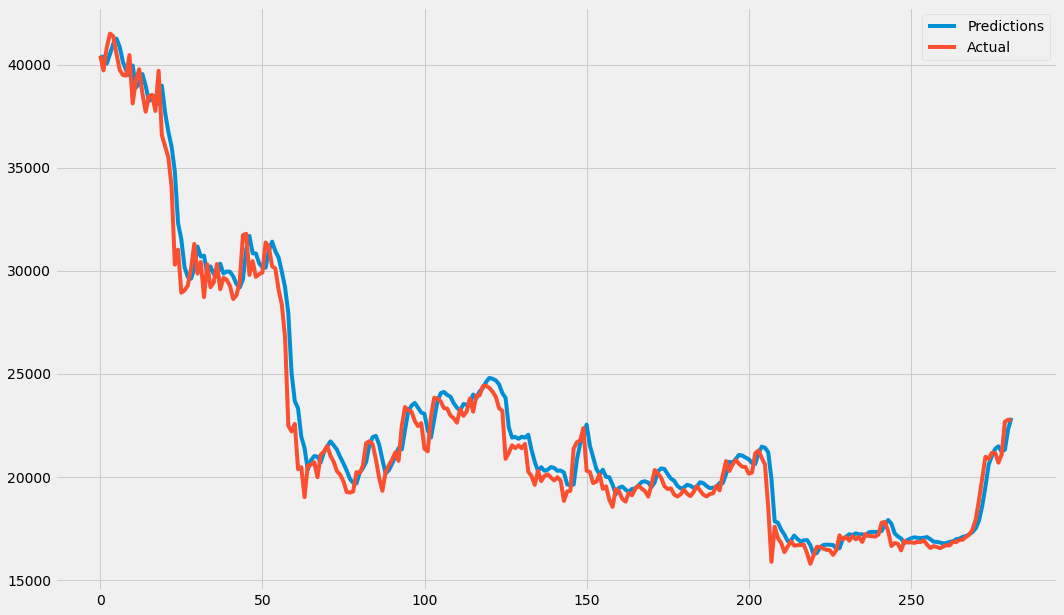

In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions on the test data
plt.figure(figsize = (16, 10))
plt.plot(testPredict, label='Predictions')
plt.plot(testY[0], label='Actual')
plt.legend()
plt.show()

### **Bewertung**

Es ist sehr schwer zu sagen warum, es nicht möglich ist noch eine bessere accuracy zu erreichen. Ich konnte mir in diesem Zusammenhang nur allgemeine Gründe dafür erklären:

1. Die Zeitreihen sind chaotisch und unvorhersehbar, daher ist es schwierig, eine hohe Genauigkeit zu erreichen.

2. Die Zeitreihen haben oft langfristige Abhängigkeiten, die normalerweise von traditionellen statistischen Modellen nicht erfasst werden können. LSTMs sind in der Lage, diese Abhängigkeiten zu erfassen, aber es kann immernoch eine gewisse Unsicherheit bleiben.

3. LSTMs sind sehr mächtige Modelle und können daher leicht überanpassen, wenn die Daten nicht sorgfältig ausgewählt und vorbereitet werden.

4. Die verwendeten Indikatoren sind nicht ausreichend, um eine hohe Genauigkeit zu erreichen.

## **Kreierung von Kauf und Verkauf Signalen basierend auf dem LSTM Modell**

Da mit dem 2ten Model trotzem eine vielverprechendes Preishistorie erreicht wurde, wird dies benutzt, um ein mögliches Schema zum Kaufen und verkaufen von Bitcoin zu erstellen

In [ ]:
from keras.models import load_model
# load model
loaded_model = load_model("lstm_model_Version2.2.h5")

Ein neues Feld wird hinzugefügt das die Signale für die Kauf und Verkauf Orders darstellen soll.

In [ ]:
# Create a new column for the buy and sell signals
import pandas as pd
testPredict_df = pd.DataFrame(testPredict, columns=["Predicted"])
testPredict_df["Signal"] = np.where(testPredict_df["Predicted"].shift(-1) > testPredict_df["Predicted"], "Buy", "Sell")

# Plot the buy and sell signals
fig = go.Figure(data=[go.Scatter(x=testPredict_df.index, y=testPredict_df["Predicted"], mode='lines', name='Predictions'),
                      go.Scatter(x=testPredict_df[testPredict_df["Signal"]=="Buy"].index, 
                                 y=testPredict_df[testPredict_df["Signal"]=="Buy"]["Predicted"], 
                                 mode='markers', 
                                 name='Buy',
                                 marker=dict(color='green')),
                      go.Scatter(x=testPredict_df[testPredict_df["Signal"]=="Sell"].index, 
                                 y=testPredict_df[testPredict_df["Signal"]=="Sell"]["Predicted"], 
                                 mode='markers', 
                                 name='Sell',
                                 marker=dict(color='red'))
                     ])
fig.update_layout(title='LSTM Buy and Sell Signals', xaxis_title='Index', yaxis_title='Price')
fig.show()

#Now plot the buy and sell signals allocated to the date

In [ ]:
# Create a new column for the returns
testPredict_df["Returns"] = testPredict_df["Predicted"].diff()

# Create a new column for the cumulative returns
testPredict_df["Cumulative Returns"] = (1 + testPredict_df["Returns"]).cumprod()

# Calculate the percentage profitability of the trades
profit = testPredict_df[testPredict_df["Signal"] == "Buy"]["Returns"].sum()
profitability = profit / len(testPredict_df[testPredict_df["Signal"] == "Buy"]) * 100

print(f'Percentage profitability of the trades: {profitability:.2f}%')

Percentage profitability of the trades: 10845.55%


Hier im Test sieht es schon sehr gut aus und wir erreichen eine positive Rentabilität. Die Höhe ist hier noch nicht relevant da es nicht and effektive Trades mit Kapital gekoppelt ist. 



---



Als erstes ein einfaches Model, das Bitcoin aufgrund der Signale kauft und wieder verkauft. Es werden ausser dem Kapital keine zusätzlichen Parameter gewählt.

In [ ]:
# Create a new column for the daily returns
testPredict_df["Returns"] = testPredict_df["Predicted"].pct_change()

# Initialize the starting capital
capital = 1000

# Create a new column for the daily capital
testPredict_df["Capital"] = 0
testPredict_df.loc[testPredict_df["Signal"] == "Buy", "Capital"] = capital

# Calculate the capital for each day
for i in range(1, len(testPredict_df)):
    if testPredict_df.loc[i, "Signal"] == "Buy":
        testPredict_df.loc[i, "Capital"] = testPredict_df.loc[i-1, "Capital"] * (1 + testPredict_df.loc[i, "Returns"])
    else:
        testPredict_df.loc[i, "Capital"] = testPredict_df.loc[i-1, "Capital"]

# Print the final capital
final_capital = testPredict_df.loc[len(testPredict_df)-1, "Capital"]
print(f'Final capital: {final_capital:.2f} USD')

# Calculate the profitability
profitability = (final_capital - capital) / capital * 100
print(f'Profitability: {profitability:.2f}%')

Final capital: 2032.67 USD
Profitability: 103.27%


Hier sieht man eine sehr hohe Rentabilität von über 100%. Das Resultat muss allerding mit Vorsicht genossen werden. Da keine Risk Management Kriterien eingebaut wurden, wäre es unter anderen Usmtäden genauso möglich gewesen, dass das Kapital auf 0 geht. 

Darum fügen wir für einen realistischeren Verlauf noch einige Indikatoren hinzu (Können nach belieben angepasst werden):

- `StopLoss` = ab wann ein trade nach Verlust geschlossen werden soll
- `invest_percentage` = wie viel des Kapitals pro Trade investiert werden soll
- `profit_taking` = ab welchen Profit der Trade geschlossen werden soll. 

In [ ]:
# Initialize the starting capital
capital = 1000
# Set the stop loss threshold
stop_loss = 0.2
# Set the profit taking threshold
profit_taking = 2
# Set the percentage of capital to be invested in each trade
invest_percentage = 0.3

# Create a new column for the daily capital
testPredict_df["Capital"] = 0
testPredict_df.loc[testPredict_df["Signal"] == "Buy", "Capital"] = capital

# Calculate the capital for each day
for i in range(1, len(testPredict_df)):
    if testPredict_df.loc[i, "Signal"] == "Buy":
        # Calculate the amount to be invested
        invested_amount = testPredict_df.loc[i-1, "Capital"] * invest_percentage
        testPredict_df.loc[i, "Capital"] = invested_amount * (1 + testPredict_df.loc[i, "Returns"]) + testPredict_df.loc[i-1, "Capital"]*(1-invest_percentage)
    else:
        testPredict_df.loc[i, "Capital"] = testPredict_df.loc[i-1, "Capital"]
    # Check for stop loss
    if testPredict_df.loc[i, "Capital"] < stop_loss*capital:
        testPredict_df.loc[i:, "Capital"] = testPredict_df.loc[i, "Capital"]
        break
    # Check for profit taking
    if testPredict_df.loc[i, "Capital"] > profit_taking*capital:
        testPredict_df.loc[i:, "Capital"] = testPredict_df.loc[i, "Capital"]
        break

# Print the final capital
final_capital = testPredict_df.loc[len(testPredict_df)-1, "Capital"]
print(f'Final capital: {final_capital:.2f} USD')

# Calculate the profitability
profitability = (final_capital - capital) / capital * 100
print(f'Profitability: {profitability:.2f}%')

Final capital: 1243.15 USD
Profitability: 24.32%


## **Visualisierung der Trading Resultate**

In [ ]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter(x=testPredict_df.index, y=testPredict_df["Capital"])])
fig.update_layout(title='Capital for each day',
                  xaxis_title='Day',
                  yaxis_title='Capital (USD)')
fig.show()

# **Bewertung des LSTM Modells**

LSTM (Long Short-Term Memory) ist ein Art von Recurrent Neural Network (RNN), das entwickelt wurde, um die Probleme von herkömmlichen RNNs zu lösen, die Schwierigkeiten haben, lange Zeitreihen zu behandeln. LSTM eignet sich sehr gut für Probleme, bei denen es darum geht, die Abhängigkeit von früheren Ereignissen in einer Zeitreihe zu verstehen, wie beispielsweise in natürlicher Sprache Prozessierung oder Textgenerierung.

Allerdings gibt es mehrere Gründe warum LSTM nicht geeignet ist für die Vorhersage von Aktienkursen:

1. Aktienkurse sind sehr volatil und unvorhersehbar. Selbst die besten Experten haben Schwierigkeiten, zukünftige Preisbewegungen vorherzusagen.

2. Aktienkurse sind nicht nur von früheren Ereignissen abhängig, sondern auch von vielen anderen Faktoren wie Fundamentaldaten, Wirtschaftsnachrichten, politischen Entscheidungen usw.

3. LSTM Modelle sind sehr anfällig für Overfitting, insbesondere wenn es um Zeitreihenvorhersage geht. Sie haben Schwierigkeiten, die Unsicherheit und Volatilität der Aktienkurse zu berücksichtigen.

4. Es gibt andere Modelle und Methoden, die sich besser für die Vorhersage von Aktienkursen eignen, wie zum Beispiel die Verwendung von technischen Indikatoren, die die Preisbewegungen und Trends analysieren, oder die Verwendung von Machine-Learning-Methoden, die auf Fundamentaldaten trainiert werden.

Es ist wichtig zu beachten, dass LSTM nicht in allen Anwendungen oder Problemstellungen geeignet ist und es immer wichtig ist, das Problem und die Daten zu verstehen und das passende Modell auszuwählen.

"Stock Price Prediction using LSTM" von Roshan Rushabh auf Medium (https://towardsdatascience.com/stock-price-prediction-using-lstm-98e50f2a5e18)

# **Algorithmic Price Trading - RSI & ADX**

## **Einführung**

Algorithmische Indikatoren und Machine-Learning-Modelle sind zwei verschiedene Ansätze zur Vorhersage von Aktienkursen.

Algorithmische Indikatoren basieren auf statistischen und technischen Analysemethoden, die auf historischen Preis- und Volumeninformationen basieren, um Muster und Trends in den Daten zu identifizieren. Sie nutzen Indikatoren wie beispielsweise Moving Averages, Relative Strength Index (RSI) und Bollinger Bands, um Prognosen für die zukünftige Kursentwicklung zu machen.

Ein Vorteil von algorithmichen Indikatoren ist, dass sie schnell und einfach zu implementieren sind und dass sie gut geeignet sind, um kurzfristige Trends und Muster zu erkennen.

Im Gegensatz dazu basieren Machine-Learning-Modelle wie LSTM auf komplexen Algorithmen, die in der Lage sind, Muster in historischen Daten zu erkennen und auf dieser Basis Prognosen für die zukünftige Kursentwicklung zu treffen. LSTM Modelle sind sehr anspruchsvoll und erfordern viel Zeit und Ressourcen für die Konstruktion und das Training.




## **Daten Laden**

Definierung Des Datensatzes und der Zeitspanne

In [ ]:
start_date = datetime(2017, 6, 1)
end_date = datetime(2022, 12, 31)
interval = '1d'
crypto_asset = 'BTC-USD'

#loading the data and removing empty value rows / 'Na'
df = yf.download(crypto_asset, start=start_date, end=end_date, interval=interval)
df = df[df.High != df.Low]
df.reset_index(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01 00:00:00+00:00,2288.330078,2448.389893,2288.330078,2407.879883,2407.879883,1653180032
1,2017-06-02 00:00:00+00:00,2404.030029,2488.550049,2373.320068,2488.550049,2488.550049,1317030016
2,2017-06-03 00:00:00+00:00,2493.719971,2581.909912,2423.570068,2515.350098,2515.350098,1514950016
3,2017-06-04 00:00:00+00:00,2547.790039,2585.889893,2452.540039,2511.810059,2511.810059,1355120000
4,2017-06-05 00:00:00+00:00,2512.399902,2686.810059,2510.219971,2686.810059,2686.810059,1369309952


## **Daten Prozessierung**

Hinzufügen von fehlenden Indikatoren (EMA & RSI). Diese werden nachher benutzt um einen Uptrend oder Downtrend zu klassifizieren und die Trade Limituerungne zu bestimmen.

In [ ]:
#adding a couple of indicators to the dataframe from the pandas_ta library:
#https://pypi.org/project/pandas-ta/
df['RSI'] = ta.rsi(df.Close, length=2)
df['EMA'] = ta.ema(df.Close, length=200)

#adding the ADX indicator
a = ta.adx(df['High'], df['Low'], df['Close'], length = 14)
data = df.join(a.ADX_14)

#cleaning the new dataframe again just to be on the safe side
data.dropna(inplace=True)
data.reset_index(inplace=True)
data[220:225]

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX_14
220,419,2018-07-25 00:00:00+00:00,8379.660156,8416.870117,8086.359863,8181.390137,8181.390137,5845400064,64.027682,7802.113039,35.751640
221,420,2018-07-26 00:00:00+00:00,8176.850098,8290.330078,7878.709961,7951.580078,7951.580078,4899089920,38.325335,7803.600273,36.420639
222,421,2018-07-27 00:00:00+00:00,7950.399902,8262.660156,7839.759766,8165.009766,8165.009766,5195879936,64.669019,7807.196388,36.859786
223,422,2018-07-28 00:00:00+00:00,8169.060059,8222.849609,8110.770020,8192.150391,8192.150391,3988750080,68.131060,7811.026776,37.267565
224,423,2018-07-29 00:00:00+00:00,8205.820312,8272.259766,8141.180176,8218.459961,8218.459961,4107190016,73.218856,7815.080837,37.749555


Erstellung des EMA Signals. Das EMA Singal bestimmt ob ein Auf oder Abwärtrend herrscht:

- Der 200-Perioden-glatte gleitende Durchschnitt (200 EMA) ist ein häufig verwendeter Indikator in der technischen Analyse, der verwendet wird, um die langfristige Kursrichtung eines Vermögenswerts, wie z.B. Bitcoin, zu bestimmen. Der Indikator berechnet den Durchschnittspreis eines Vermögenswerts über einen Zeitraum von 200 Perioden (in der Regel Tage) und glättet ihn, um eine gleitende Linie zu erhalten.

- Wenn der aktuelle Kurs des Vermögenswerts über dem 200 EMA liegt, wird allgemein angenommen, dass der Vermögenswert in einem Aufwärtstrend ist, und umgekehrt, wenn der Kurs unter dem 200 EMA liegt, wird allgemein angenommen, dass der Vermögenswert in einem Abwärtstrend ist.

- Ein großer Vorteil des 200 EMA ist, dass er ein langfristiger Indikator ist, was bedeutet, dass er die langfristige Kursrichtung eines Vermögenswerts zeigt. Dies kann besonders nützlich sein, um Trends in volatilen Märkten wie dem Kryptowährungsmarkt zu identifizieren, da er eine gute Vorstellung davon gibt, ob ein Vermögenswert langfristig unterbewertet oder überbewertet ist.

Referenz: "Bitcoin trading: Momentum strategies with different moving averages" https://cointelegraph.com/news/bitcoin-trading-momentum-strategies-with-different-moving-averages



In [ ]:
# Defining the Signal for the trades based on the candles trending below or above the EMA in a certain treshold
def EMA_Signal(df, backcandles):
  signal = [0] * len(df)
  for row in range(backcandles, len(df)):
    #dnt = Downtrend, upt = uptrend
    #adding the signals based on the trend from 1 to 3
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row + 1):
      if df.High[i] >= df.EMA[i]:
        dnt = 0
      if df.Low[i] <= df.EMA[i]:
        upt = 0
    if upt == 1 and dnt ==1:
      #no trend = 3
      signal[row] = 3
    elif upt == 1:
      # last defined amount of candles are trading above the moving average
      signal[row] = 2
      # last defined amount of candles are trading below the moving average
    elif dnt == 1: 
      signal[row] = 1
  df["EMA_Signal"] = signal

# The variable "backcandles" indicates how many candles the price is supposed to trending below or above the EMA
EMA_Signal(data, 6)
  

## **Order Signale**

Wir benutzen Zum bestimmen wann und ob ein KaufSignal ausgeführt werden soll, den RSI Indikator zusammen mit dem EMA Signal. Dabei wird hier nur ein Trade / Kauf ausgeführt falls, der `RSI unter 25% liegt`, `der ADX über 20` und das EMA Signal das wir vorher bestimmt haben eine Aufwärtstrend angibt. Obwohl der Standard für den RSI eher bei 70 zu 30 ist, zeigte sich nach mehreren Versuchen dieser Paramater als lukrativer in dieser Marktphase.



---


`Der Relative Strength Index (RSI)` ist ein populärer technischer Indikator, der verwendet wird, um die relative Stärke oder Schwäche eines Wertpapiers im Vergleich zu seinen Vergangenheitskursen zu messen. Hier sind einige typische RSI-Trading-Strategien:

- Overbought/Oversold-Strategie: Diese Strategie basiert darauf, Positionen zu eröffnen, wenn der RSI einen Wert von über 70 oder unter 30 erreicht hat, um anzuzeigen, dass ein Wertpapier überkauft oder überverkauft ist.

- Trendfolge-Strategie: Diese Strategie basiert darauf, Positionen zu eröffnen, wenn der RSI einen Aufwärtstrend oder Abwärtstrend bestätigt hat.

- Divergenz-Strategie: Diese Strategie basiert darauf, Positionen zu eröffnen, wenn der RSI eine Divergenz zum Kursverlauf aufweist.



---

Der `Average Directional Index (ADX)` ist ein technischer Indikator, der verwendet wird, um die Trendstärke in einem Markt zu messen. Er wird häufig in Verbindung mit dem Positive Directional Indicator (+DI) und dem Negative Directional Indicator (-DI) verwendet. Hier sind einige typische ADX-Strategien für den Bitcoin-Handel:

- Trendfolge-Strategie: Diese Strategie basiert darauf, Positionen zu eröffnen, wenn der ADX einen Wert von über 25 erreicht hat, was darauf hindeutet, dass ein starker Trend vorliegt, und Positionen zu schließen, wenn der ADX unter 20 fällt, was darauf hindeutet, dass der Trend schwächer wird.

- Kaufen bei PlusDI und verkaufen bei MinusDI: Diese Strategie basiert darauf, Positionen zu eröffnen, wenn der PlusDI den MinusDI überkreuzt, was darauf hindeutet, dass ein Aufwärtstrend beginnt, und Positionen zu schließen, wenn der PlusDI den MinusDI unterkreuzt, was darauf hindeutet, dass ein Abwärtstrend beginnt.

- Divergenz-Strategie: Diese Strategie basiert darauf, Positionen zu eröffnen, wenn es eine Divergenz zwischen dem Kursverlauf des Bitcoin und dem ADX gibt, was darauf hindeutet, dass der aktuelle Trend möglicherweise bald umkehren könnte.

Referenz: "ADX: The Trend Strenght Indicator https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp 

In [ ]:
# Computing the Order / trade Signals based on the added Indicators
def Tot_Signal(df, ADX):
  order_signal = [0]*len(df)
  for i in range(0, len(df)):
    # order requirements
    if df.RSI[i] <= 25 and ADX[i] >= 20 and df.EMA_Signal[i] == 2:
      # entry Signal for a long position / trigger buy
      order_signal[i] = 2
  # adding the buy signals to the dataframe  
  df['Order_Signal'] = order_signal

Tot_Signal(data, data.ADX_14)

## **Visualisierung**

Um sicher zu gehen ob überhaupt Kaufsignale mit diesen Parametern ausgelöst werden überprüfen wir den die Kolumne nach !=0 Werten:

In [ ]:
data[data.Order_Signal != 0]

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX_14,EMA_Signal,Order_Signal
7,206,2017-12-24 00:00:00+00:00,14608.200195,14626.000000,12747.700195,13925.799805,13925.799805,11572299776,22.977149,6018.910313,46.805914,2,2
13,212,2017-12-30 00:00:00+00:00,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808,7.368944,6523.729310,33.684968,2,2
22,221,2018-01-08 00:00:00+00:00,16476.199219,16537.900391,14208.200195,15170.099609,15170.099609,18413899776,14.442239,7304.889053,22.460749,2,2
23,222,2018-01-09 00:00:00+00:00,15123.700195,15497.500000,14424.000000,14595.400391,14595.400391,16659999744,9.412206,7377.431454,21.850480,2,2
25,224,2018-01-11 00:00:00+00:00,14968.200195,15018.799805,13105.900391,13405.799805,13405.799805,16534099968,10.501620,7512.243951,21.863689,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1630,2021-11-17 00:00:00+00:00,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,39178392930,14.002735,48948.021301,25.563052,2,2
1432,1631,2021-11-18 00:00:00+00:00,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,41388338699,3.830874,49027.564738,25.287899,2,2
1436,1635,2021-11-22 00:00:00+00:00,58706.847656,59266.359375,55679.839844,56289.289062,56289.289062,35036121783,14.700682,49387.263717,24.074135,2,2
1440,1639,2021-11-26 00:00:00+00:00,58960.285156,59183.480469,53569.765625,53569.765625,53569.765625,41810748221,14.060221,49652.816978,24.470074,2,2


Jetzt schauen wir uns diese Signale auch nochmal als Chart an, um einen genauren Einblick zu bekommen wo genau diese Kauf Signale getriggert werden. Hier können wir schon eine erste optische Überprüfung des algorithmus durchführen und allfällige offensichtlich schlechte Signale evaluieren und den algorythmus / Bedignungen anpassen.

In [ ]:
def pointpos(df):
  if df['Order_Signal'] == 1:
    return df['High'] + 2e-3
  elif df['Order_Signal'] == 2:
    return df['Low'] - 2e-3
  else:
    return np.nan

data['Point_Position'] = data.apply(lambda row: pointpos(row), axis=1)

data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX_14,EMA_Signal,Order_Signal,Point_Position
0,199,2017-12-17 00:00:00+00:00,19475.800781,20089.000000,18974.099609,19140.800781,19140.800781,13314599936,74.444017,5300.055453,60.853965,0,0,NaN
1,200,2017-12-18 00:00:00+00:00,19106.400391,19371.000000,18355.900391,19114.199219,19114.199219,14839499776,72.149749,5437.509620,60.938265,0,0,NaN
2,201,2017-12-19 00:00:00+00:00,19118.300781,19177.800781,17275.400391,17776.699219,17776.699219,16894499840,17.601504,5560.287626,59.785544,0,0,NaN
3,202,2017-12-20 00:00:00+00:00,17760.300781,17934.699219,16077.700195,16624.599609,16624.599609,22149699584,7.644574,5670.380282,57.549912,0,0,NaN
4,203,2017-12-21 00:00:00+00:00,16642.400391,17567.699219,15342.700195,15802.900391,15802.900391,16516599808,4.230729,5771.201378,54.837990,0,0,NaN


In [ ]:
data_plot = data.copy()
fig = go.Figure(data=[go.Candlestick(x=data_plot.index,
                open=data_plot['Open'],
                high=data_plot['High'],
                low=data_plot['Low'],
                close=data_plot['Close']),
                go.Scatter(x=data_plot.index, y=data_plot.EMA, line=dict(color='orange', width=2), name="EMA"),
                go.Scatter(x=data_plot.index, y=data_plot.RSI, line=dict(color='blue', width=2), name="RSI_2")])

fig.add_scatter(x=data_plot.index, y=data_plot['Point_Position'], mode="markers",
                marker=dict(size=6, color="Purple"),
                name="Signal")

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(autosize=False, width=1600, height=800,margin=dict(l=50,r=50,b=100,t=100,pad=4), paper_bgcolor="white")
fig.show()

## **Backtesting**

Backtesting ist ein wichtiger Bestandteil des algorithmischen Handels, da es ermöglicht, die Leistung einer Handelsstrategie anhand historischer Daten zu überprüfen, bevor sie in einem Live-Markt umgesetzt wird. Es gibt mehrere Gründe, warum Backtesting wichtig ist:

- Es ermöglicht es, die Robustheit einer Handelsstrategie zu überprüfen: Durch das Testen einer Handelsstrategie anhand historischer Daten kann man sehen, wie gut die Strategie in der Vergangenheit funktioniert hat und ob sie robust genug ist, um in unterschiedlichen Marktbedingungen erfolgreich zu sein.

- Es ermöglicht es, die Rentabilität einer Handelsstrategie zu überprüfen: Durch das Simulieren von Trades anhand historischer Daten kann man sehen, ob eine Handelsstrategie rentabel ist und welche Gewinne oder Verluste erwartet werden können.

- Es ermöglicht es, die Auswirkungen von Anpassungen an einer Handelsstrategie zu überprüfen: Durch das Testen von Anpassungen an einer Handelsstrategie anhand historischer Daten kann man sehen, welche Auswirkungen diese Anpassungen haben und ob sie die Leistung der Strategie verbessern oder verschlechtern.

Referenz: "The Importance of Backtesting Trading Strategies" https://www.investopedia.com/articles/trading/05/030205.asp#:~:text=Backtesting%20is%20one%20of%20the,to%20the%20real%20world%20markets.



---



**Parameter: (Können nach belieben geändert werden, je nach Anwendungsfall)**

- initit / trafingsize = Der prozentualle Anteil der für die Trades benutzt wird
-- Wir benutzen hier zwischen 0.1 und 1 um die Gewinnrate je nach Datensatz zu erhöhen. Ich habe hier 0.5 gewählt da diese denn höchste Gewinnrate aufwies.
- StopLoss = Die prozentualle Verlustrate nachdem ein offener Trade geschlossen wird. 
- RSI = WIr benutzen den RSI um einen weitere Bedingung festzulegen, wann ein offener Trade geschlossen werden soll.
- margin = Hier bestimmen wir die "Zielrendite" für jeden offenen Trade. Der margin kann wie die anderen Parameter nach belieben angepasst werden.
- cash = Das verwendete Kapital. Hat auf die prozentualle Rentabilität keinen Einfluss
- commmission = Miteinberechnung allälliger Gebühren. Einfachhalber wird dieser auf 0 gesetzt, da wir nur eine Simulation durchführen.

In [ ]:
# Loading the Signals into the backtesting strategy
data_trader = data[:].copy()
def SIGNAL():
  return data_trader.Order_Signal

class RSI_ADX_Strategy(Strategy):
    initsize = 0.5
    TradingSize = initsize
    
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()
        # Setting the stop loss 
        StopLoss=0.05
        # Checking if there is already an open trade
        if len(self.trades)>0:
            # Checking if the open trade is already longer open than specific time "entry_time"
            if self.data.index[-1]-self.trades[-1].entry_time>=30:
                self.trades[-1].close()
            # Second condition is fo the RSI to be above 75 otherwise close the trade
            if self.trades[-1].is_long and self.data.RSI[-1]>=75:
                self.trades[-1].close()
            # If a short position is open (not applicable for this run though) the RSI needs to be below 25 otherwise close the trade
            elif self.trades[-1].is_short and self.data.RSI[-1]<=25:
                self.trades[-1].close()
        # If the Signal calls an uptrend and there is currently no trade open "(len.trades)==0", execute the trade
        # This ensures not multiple trades are open simultanously
        if self.signal==2 and len(self.trades)==0:
            # Stop loss = the current candles "data.Low[-1]" or the previous candles low "data.Low[-2]" (whichever is lower) * The StopLoss defined above  
            StopLoss1 = min(self.data.Low[-1],self.data.Low[-2])*(1-StopLoss)
            #Entering the market with the above defined StopLoss and Trading amount that you want to use in the trades "TradingSize"
            self.buy(sl=StopLoss1,size=self.TradingSize)

# Defining the Trading frame: data, strategy, cash amount, margin and evtl. commission / trading fees
bt = Backtest(data_trader, RSI_ADX_Strategy, cash=10000, margin=1/6, commission=.000)
stat = bt.run()
stat

<ipython-input-67-3c0fb737fa8e>:38: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).

<ipython-input-67-3c0fb737fa8e>:38: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    1839.0
Duration                               1839.0
Exposure Time [%]                   17.282609
Equity Final [$]                 23336.115967
Equity Peak [$]                  37336.604639
Return [%]                          133.36116
Buy & Hold Return [%]              -13.260756
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -63.225474
Avg. Drawdown [%]                  -25.291984
Max. Drawdown Duration                  653.0
Avg. Drawdown Duration             197.111111
# Trades                                 71.0
Win Rate [%]                        61.971831
Best Trade [%]                      16.130783
Worst Trade [%]                    -15.273633
Avg. Trade [%]                    

Wir sehen hier das mit dieser Strategie in diesem Rahmen eine Durchaus rentables Trading durchgeführt werden kann mit einem Return von 133.36% und einer Gewinnrate von ~61%. Das scheint mit einer so einfachen Startegie zu schön um wahr zu sein. Dazu mehr in der Bewertung.



---


Jetzt Plotten wir die Trades noch um Sie uns genauer anzuschauen.

In [ ]:
bt.plot()

Row(id='1441', ...)

In [ ]:
# Checking the trades
stat._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,2,8,10,13995.900391,16163.500000,4335.199219,0.154874,8,10,2
1,3,14,17,12897.700195,14978.200195,6241.500000,0.161308,14,17,3
2,4,23,25,15123.700195,13497.790186,-6503.640039,-0.107507,23,25,2
3,3,26,30,13453.900391,12450.605371,-3009.885059,-0.074573,26,30,4
4,2,31,31,11431.099609,9685.155371,-3491.888477,-0.152736,31,31,0
...,...,...,...,...,...,...,...,...,...,...
66,1,1427,1429,64158.121094,65521.289062,1363.167969,0.021247,1427,1429,2
67,1,1430,1430,63721.195312,60370.737305,-3350.458008,-0.052580,1430,1430,0
68,1,1431,1433,60139.621094,56065.519141,-4074.101953,-0.067744,1431,1433,2
69,1,1437,1443,56304.554688,57291.906250,987.351562,0.017536,1437,1443,6


# **Algorithmic Price Trading - Bollinger Bands**

Ein weiterer beliebter Indikator ist das Bollinger Band. Es ist vorallem in Crypto nützlich weil, Bollinger Bänder sind ein Indikator, der in der technischen Analyse verwendet wird, um die Volatilität eines Vermögenswerts zu messen. Sie bestehen aus einer Mittellinie, die auf der Grundlage der Durchschnittskursen berechnet wird, und zwei oberen und unteren Bändern, die auf der Grundlage der Standardabweichung berechnet werden. Bollinger Bänder können Händlern helfen, die Volatilität von Bitcoin zu verstehen und potenzielle Einstiegs- und Ausstiegszeitpunkte zu identifizieren.

Die Verwendung von Bollinger Bändern beim Trading mit Bitcoin bietet einige Vorteile:

1. Volatilitätsmessung: Bollinger Bänder können verwendet werden, um die Volatilität des Bitcoin-Preises zu messen. Wenn die Bänder eng beieinander liegen, ist die Volatilität gering, während breitere Bänder auf eine höhere Volatilität hinweisen.

2. Identifizierung von Überkauft- und Überverkauft-Zuständen: Wenn der Bitcoin-Preis die obere Bollinger-Linie erreicht, wird angenommen, dass der Preis überkauft ist, während ein Preis, der die untere Bollinger-Linie erreicht, als überverkauft gilt. Dies kann Händlern als Signal dienen, ihre Positionen einzunehmen oder zu schließen.

3. Bestätigung von Trendwechsel: Wenn der Bitcoin-Preis einen Trendwechsel signalisiert, kann dies eine Hilfestellung sein, ob die Strategie in eine Kauf oder Verkauf Strategie ändern sollte.

Referenz: "Bollinger Bands" https://corporatefinanceinstitute.com/resources/equities/bollinger-bands/


---



**Anwendungsfall:**

Auch hier benutzen wir wieder die selben Daten von yfinance, welche wir auch in den vorherigen Modellen benutzt haben. Hier benurten wir aber statt dem `ADX` die Bollinger Bände um das Kauf/Verkauf Signal zu trainieren.

**Rahmenbedingungen:**

1. Wir benutzen auch für dieses Modell den `200EMA` um den Preistrend zu bestimmen.
Wenn der Preis sich über dem` 200EMA` befindet, gilt es als Aufwärtstrend und vis versa. 

2. Um die trades aber noch etwas lukrativer zu machen / dem "Preis zuvor zu kommen", fügen wir hier `"LIMIT ORDERS" `ein. Diese sollen in Anbetracht des momentanen Preises, das Kauf & Verkaufsignal mit einem prozentuallen Abstand setzten.

3. Wir wollen immer nur einen offenen Trade haben (wird sonst zu komplex). Darum muss immer überprüft werden ob ein aktiver Trade bereits läuft. Orders die nicht aktiviert wurden weil der gesetzte Abstand zum Echtpreis nicht erreicht wurde müssen überschrieben werden, falls eine neue Order gesetzt wird. 

4. Aktive Orders die im Profit sind aber nie das Verkaufsignal erhalten müssen nach einer bestimmten Zeit geschlossen werden

5. Wir setzen wieder zusätzliche Parameter ein: `Stop Loss, Margin` etc. um die Strategie weiter zu verbessern.

## **Laden der Preisdaten von yfinance**

In [ ]:
start_date = datetime(2016, 6, 1)
end_date = datetime(2022, 12, 31)
interval = '1d'
crypto_asset = 'BTC-USD'

#loading the data and removing empty value rows / 'Na'
df = yf.download(crypto_asset, start=start_date, end=end_date, interval=interval)
df = df[df.High != df.Low]
df.reset_index(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-01 00:00:00+00:00,531.106995,543.080017,525.635986,536.919983,536.919983,86061800
1,2016-06-02 00:00:00+00:00,536.515015,540.351990,533.078003,537.971985,537.971985,60378200
2,2016-06-03 00:00:00+00:00,537.682007,574.638000,536.919983,569.193970,569.193970,122020000
3,2016-06-04 00:00:00+00:00,569.705017,590.132019,564.237976,572.726990,572.726990,94925296
4,2016-06-05 00:00:00+00:00,573.307983,582.807983,569.177979,574.976990,574.976990,68874096


## **Daten Prozessierung**

Zusätzlich zu den bereits vorherig benutzten Indikatoren laden wie hier auch noch die Bollinger Bänder. 

**Tweeks:**
Der Standard liegt bei 20 lenght und 2.5 std (standard deviation). 
Nach mehreren Tests sind meiner Meiung nach die unten aufgeführten Parameter besser weil: 

- Bitcoin im Vergleich zu traditionellen Märtken viel volatiler ist. Dehsalb sollte eine höhere length und tiefere Standard deviation angestrebt werden mit Bollinger Bände. Das führt dazu, dass der Preischart öfter aus dem Band schlagen wo wir unsere Kauf und Verkaufsignale setzten (siehe weiter unten)

In [ ]:
df_bbands = df

#adding a couple of indicators to the dataframe from the pandas_ta library:
#https://pypi.org/project/pandas-ta/
df_bbands['RSI'] = ta.rsi(df.Close, length=2)
df_bbands['EMA'] = ta.ema(df.Close, length=200)

#adding the Bollinger bands
boll_bands = ta.bbands(df.Close, length=30, std= 2)
boll_bands[0:50]
df_bbands = df_bbands.join(boll_bands)

#cleaning the new dataframe again just to be on the safe side
df_bbands.dropna(inplace=True)
df_bbands.reset_index(inplace=True)
df_bbands[220:230]

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0
220,419,2017-07-25 00:00:00+00:00,2757.500000,2768.080078,2480.959961,2576.479980,2576.479980,1460089984,18.977129,1789.589197,2066.950326,2478.620337,2890.290347,33.217674,0.618857
221,420,2017-07-26 00:00:00+00:00,2577.770020,2610.760010,2450.800049,2529.449951,2529.449951,937404032,13.903242,1796.950996,2068.246168,2480.320337,2892.394505,33.227496,0.559613
222,421,2017-07-27 00:00:00+00:00,2538.709961,2693.320068,2529.340088,2671.780029,2671.780029,789104000,67.117432,1805.655762,2067.241994,2484.298006,2901.354018,33.575361,0.724768
223,422,2017-07-28 00:00:00+00:00,2679.729980,2897.449951,2679.729980,2809.010010,2809.010010,1380099968,84.997828,1815.639387,2060.065476,2492.105339,2924.145201,34.672681,0.866754
224,423,2017-07-29 00:00:00+00:00,2807.020020,2808.760010,2692.800049,2726.449951,2726.449951,803745984,51.380616,1824.702178,2058.424943,2498.343001,2938.261060,35.216786,0.759261
225,424,2017-07-30 00:00:00+00:00,2724.389893,2758.530029,2644.850098,2757.179932,2757.179932,705942976,62.439425,1833.980564,2058.020647,2507.554329,2957.088011,35.854352,0.777649
226,425,2017-07-31 00:00:00+00:00,2763.239990,2889.620117,2720.610107,2875.340088,2875.340088,860574976,86.337599,1844.342350,2054.762686,2522.247331,2989.731975,37.068898,0.877652
227,426,2017-08-01 00:00:00+00:00,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1324669952,32.075993,1853.038048,2056.620905,2529.306999,3001.993092,37.376728,0.699872
228,427,2017-08-02 00:00:00+00:00,2727.129883,2762.530029,2668.590088,2710.669922,2710.669922,1094950016,30.239366,1861.571699,2057.160197,2534.193994,3011.227791,37.647773,0.684972
229,428,2017-08-03 00:00:00+00:00,2709.560059,2813.310059,2685.139893,2804.729980,2804.729980,804796992,71.163205,1870.956358,2054.620130,2540.963664,3027.307197,38.280243,0.771173


Hier sehen wir wie die verschiedenen Bänder Ebenen in den Datensatz eingefügt wurden. ACHTUNG! Wenn die lenght und/oder die std geändert werden, ändert sich auch der Name der Kolumnen. Dies muss beachted werden falls man diese Werte weiter anpassen möchte.


---



Jetzt bestimmen wir den Ab- oder Auftrend des Preises basierend auf dem EMA und vergeben ein entsprechendes Signal. Das wird wiederum als neue Kolumne in das Datenset eingefplegt

In [ ]:
# Defining the Signal for the trades based on the candles trending below or above the EMA in a certain treshold
def EMA_Signal(df, backcandles):
  signal = [0] * len(df)
  for row in range(backcandles, len(df)):
    #dnt = Downtrend, upt = uptrend
    #adding the signals based on the trend from 1 to 3
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row + 1):
      if df.High[i] >= df.EMA[i]:
        dnt = 0
      if df.Low[i] <= df.EMA[i]:
        upt = 0
    if upt == 1 and dnt ==1:
      #no trend = 3
      signal[row] = 3
    elif upt == 1:
      # last defined amount of candles are trading above the moving average
      signal[row] = 2
      # last defined amount of candles are trading below the moving average
    elif dnt == 1: 
      signal[row] = 1
  df["EMA_Signal"] = signal

# The variable "backcandles" indicates how many candles the price is supposed to trending below or above the EMA
EMA_Signal(df_bbands, 6)

df_bbands[df_bbands.EMA_Signal != 0]

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMA_Signal
6,205,2016-12-23 00:00:00+00:00,864.888000,925.117004,864.677002,921.984009,921.984009,275564000,99.970992,664.657954,699.957401,777.537400,855.117399,19.955310,1.430953,2
7,206,2016-12-24 00:00:00+00:00,922.179993,923.479004,886.335022,898.822021,898.822021,137727008,63.954936,666.987945,695.167452,782.821834,870.476217,22.394465,1.161691,2
8,207,2016-12-25 00:00:00+00:00,899.651978,899.651978,862.424011,896.182983,896.182983,143664992,59.102830,669.268492,692.764983,787.972968,883.180952,24.165292,1.068282,2
9,208,2016-12-26 00:00:00+00:00,896.905029,913.184021,896.898010,907.609985,907.609985,123771000,75.318714,671.640049,691.379375,793.713900,896.048424,25.786250,1.056489,2
10,209,2016-12-27 00:00:00+00:00,908.354004,940.047974,904.255005,933.197998,933.197998,167308000,91.108243,674.242616,689.156702,800.419334,911.681966,27.801086,1.096690,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2399,2022-12-26 00:00:00+00:00,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,88.086996,21743.494831,16270.005421,16955.040039,17640.074657,8.080602,0.474282,1
2201,2400,2022-12-27 00:00:00+00:00,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,19.122633,21693.481687,16299.482076,16964.124935,17628.767793,7.835864,0.314223,1
2202,2401,2022-12-28 00:00:00+00:00,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,8.416824,21642.328359,16351.222918,16975.299935,17599.376952,7.352766,0.161318,1
2203,2402,2022-12-29 00:00:00+00:00,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479,43.139217,21592.577249,16376.418202,16981.878581,17587.338959,7.130664,0.219604,1


Wir überprüfen hier nochmal ob hier die EMA Signale vergeben werden



---



Eine weitere Kolumne die wir hinzufügen ist das `Order_Singal` für die Trades. Diese werden unter der berücksichtigung der Bollinger Bands und EMA Kriterien ausgeführt. 

**Parameter**:
`percent` = Das ist der prozentualle Unterschied zum Echtpreis wo wir das Signal setzten wollen.

Hier kann man auch beliebige Werte wählen je nach Datensatz und oder Marktsituation.

In [ ]:
# Computing the Order / trade Signals based on the added Indicators
def Tot_Signal(df, percent):
  order_signal = [0]*len(df)
  for i in range(0, len(df)):
    # order requirements
    # Checking if we are currently in an uptrend and below the high limit of the bollinger band
    if df.EMA_Signal[i] == 2 and df.Close[i] <= df['BBL_30_2.0'][i]:
        order_signal[i] = df.Close[i] - df.Close[i] * percent
    # Checking if we are currently in an downtrend and above the Low limit of the bollinger band
    elif df.EMA_Signal[i] == 1 and df.Close[i] >= df['BBU_30_2.0'][i]:
        order_signal[i] = df.Close[i] + df.Close[i] * percent
  
  df['Order_Signal'] = order_signal

# The precentage indicates to which percentage distance relatively to the last closing price the order should be placed - VARIABLE
Tot_Signal(df_bbands, 0.03)

df_bbands[df_bbands.Order_Signal != 0]

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMA_Signal,Order_Signal
91,290,2017-03-18 00:00:00+00:00,1099.689941,1114.069946,957.655029,973.817993,973.817993,621302016,1.737138,886.137191,1016.878194,1169.118262,1321.358330,26.043570,-0.141422,2,944.603453
97,296,2017-03-24 00:00:00+00:00,1038.449951,1040.469971,934.357971,937.520020,937.520020,491038016,8.230669,895.035981,985.066824,1161.636263,1338.205702,30.400125,-0.134641,2,909.394419
206,405,2017-07-11 00:00:00+00:00,2385.889893,2413.469971,2296.810059,2337.790039,2337.790039,1329760000,5.564620,1691.328904,2371.110401,2566.039339,2760.968277,15.192981,-0.085468,2,2267.656338
209,408,2017-07-14 00:00:00+00:00,2360.590088,2363.250000,2183.219971,2233.340088,2233.340088,882502976,9.147030,1710.189113,2303.823029,2536.274674,2768.726320,18.330163,-0.151608,2,2166.339885
210,409,2017-07-15 00:00:00+00:00,2230.120117,2231.139893,1990.410034,1998.859985,1998.859985,993608000,2.506953,1713.061460,2219.265934,2520.750671,2822.235409,23.920235,-0.365534,2,1938.894186
211,410,2017-07-16 00:00:00+00:00,1991.979980,2058.770020,1843.030029,1929.819946,1929.819946,1182870016,1.756206,1715.218261,2132.463853,2501.126001,2869.788149,29.479694,-0.274837,2,1871.925348
271,470,2017-09-14 00:00:00+00:00,3875.370117,3920.600098,3153.860107,3154.949951,3154.949951,2716310016,0.681605,2642.366906,3679.761114,4294.898665,4910.036217,28.645032,-0.426580,2,3060.301453
395,594,2018-01-16 00:00:00+00:00,13836.099609,13843.099609,10194.900391,11490.500000,11490.500000,18853799936,4.314429,8569.557106,11863.890828,15018.423242,18172.955656,42.008836,-0.059183,2,11145.785000
396,595,2018-01-17 00:00:00+00:00,11431.099609,11678.000000,9402.290039,11188.599609,11188.599609,18830600192,3.514155,8595.617230,11689.786857,14754.236589,17818.686320,41.539929,-0.081774,2,10852.941621
577,776,2018-07-17 00:00:00+00:00,6739.649902,7387.240234,6684.169922,7321.040039,7321.040039,5961950208,98.921838,7936.858939,5866.529518,6471.952653,7077.375788,18.709134,1.201235,1,7540.671240


Anders als bei dem RSI trading Signal müssen wir hier Werte setzen für das Signal, da wir den Kauf bzw. Verkauf mit einem prozentuallen Abstand zum echten Preis setzen wollen.

## **Visualisierung**

In [ ]:
def pointposbreak(df):
  if df['Order_Signal']!=0:
    return df['Order_Signal']
  else:
    return np.nan

df_bbands['pointposbreak'] = df_bbands.apply(lambda row: pointposbreak(row), axis=1)

df_bbands.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMA_Signal,Order_Signal,pointposbreak
0,199,2016-12-17 00:00:00+00:00,785.166016,792.508972,784.864014,790.828979,790.828979,78989800,91.367582,654.129986,723.670381,759.687101,795.703822,9.481988,0.932325,0,0.0,NaN
1,200,2016-12-18 00:00:00+00:00,791.007996,794.737000,788.026001,790.530029,790.530029,60524400,86.559736,655.487200,723.454629,760.985268,798.515907,9.863697,0.893609,0,0.0,NaN
2,201,2016-12-19 00:00:00+00:00,790.692017,793.611023,790.320007,792.713989,792.713989,74886400,92.401638,656.852641,723.322318,762.355200,801.388083,10.240078,0.888887,0,0.0,NaN
3,202,2016-12-20 00:00:00+00:00,792.247009,801.336975,791.497009,800.875977,800.875977,99629296,98.211660,658.285709,725.074709,764.683533,804.292356,10.359534,0.956874,0,0.0,NaN
4,203,2016-12-21 00:00:00+00:00,800.643982,834.281006,799.405029,834.281006,834.281006,155576000,99.753638,660.036906,722.153393,767.851300,813.549207,11.902801,1.226835,0,0.0,NaN


In [ ]:
df_plot = df_bbands.copy()
#dfpl=dfpl.drop(columns=['level_0'])#!!!!!!!!!!
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=df_plot.index,
                open=df_plot['Open'],
                high=df_plot['High'],
                low=df_plot['Low'],
                close=df_plot['Close']),
                go.Scatter(x=df_plot.index, y=df_plot.EMA, line=dict(color='orange', width=2), name="EMA"),
                go.Scatter(x=df_plot.index, y=df_plot['BBL_30_2.0'], line=dict(color='blue', width=1), name="BBL_30_2.0"),
                go.Scatter(x=df_plot.index, y=df_plot['BBU_30_2.0'], line=dict(color='blue', width=1), name="BBU_30_2.0")])

fig.add_scatter(x=df_plot.index, y=df_plot['pointposbreak'], mode="markers",
                marker=dict(size=5, color="Purple"),
                name="Signal")
fig.show()

Hier werden die Preisdaten mit den EMA, dem Bollinger Band und den Kaufsignalen visualisiert. Wir sehen hier, dass die Signale in den meisten Fällen am unteren Rand oder unter dem Bollinger Band auftauchen, genauso war das gewollt. Weiter sieht man auch das die Kaufpreise manchmal unter den Kerzen platziert sind. Das liegt an der prozentuallen Abstand der definiert wurde um die Rendite ewtas zu verbessern / StopLoss abzufedern. 

## **Backtesting**

In [ ]:
df_backtesting = df_bbands[:].copy()
def SIGNAL():
    return df_backtesting.Order_Signal

In [ ]:
class MyStrat(Strategy):
    initsize = 0.9
    ordertime=[]
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()
        
        for j in range(0, len(self.orders)):
            # Days max to fulfill the order
            if self.data.index[-1]-self.ordertime[0]>10:
                self.orders[0].cancel()
                self.ordertime.pop(0)   
            
        #Checks if there is an open trade. above 0 means yes
        if len(self.trades)>0:
            # Checks how long the trades is already open - 'entry_time'
            if self.data.index[-1]-self.trades[-1].entry_time>=10:
                self.trades[-1].close()
            #Checks the RSI conditions. If not met anymore the trade gets closed
            if self.trades[-1].is_long and self.data.RSI[-1]>=50:
                self.trades[-1].close()
            #Checks the same for the short trades
            elif self.trades[-1].is_short and self.data.RSI[-1]<=50:
                self.trades[-1].close()
        
        # Conditions to open the trade (Long Position)
        # Signal = there has been a order signal, trades = there are no active trades, EMA = uptrend signal
        if self.signal!=0 and len(self.trades)==0 and self.data.EMA_Signal==2:
            # Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order with stop loss = sl, order price = signal (defined on "def Tot_Signal"), and amount to be use from the capital = initsize
            self.buy(sl=self.signal/2, limit=self.signal, size=self.initsize)
            # Addding the creation time of the order to a memory to trace it
            self.ordertime.append(self.data.index[-1])
        
        # Conditions to open the trade (Short Position)
        # Signal = there has been a order signal, trades = there are no active trades, EMA = downtrend signal
        elif self.signal!=0 and len(self.trades)==0 and self.data.EMA_Signal==1:
            # Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order with stop loss = sl, order price = signal (defined on "def Tot_Signal"), and amount to be use from the capital = initsize
            self.sell(sl=self.signal*2, limit=self.signal, size=self.initsize)
            # Addding the creation time of the order to a memory to trace it
            self.ordertime.append(self.data.index[-1])

bt = Backtest(df_backtesting, MyStrat, cash=10000, margin=1/5, commission=.00)
stat = bt.run()
stat

<ipython-input-77-62100e005d1b>:53: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).

<ipython-input-77-62100e005d1b>:53: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    2204.0
Duration                               2204.0
Exposure Time [%]                     2.76644
Equity Final [$]                 70622.061844
Equity Peak [$]                  89863.078251
Return [%]                         606.220618
Buy & Hold Return [%]              1999.39018
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -84.16019
Avg. Drawdown [%]                  -23.774589
Max. Drawdown Duration                  593.0
Avg. Drawdown Duration             149.444444
# Trades                                 14.0
Win Rate [%]                        85.714286
Best Trade [%]                      18.869009
Worst Trade [%]                    -10.495387
Avg. Trade [%]                    

Mit diesem Modell können wir eine enorme Gewinnrate von `>600%` erreichen. Die Gewinnrate von `>85%` ist ebenfalls sehr beindruckend. Das wirft allerdings einige Fragen auf. Auch wenn wir dieses Modell optimiert haben mit mehreren Parametern, scheint dieses Ergebniss in Anbetracht der sehr hohen Rendite im Vergleich zu der Komplexität des Modells,` "ZU GUT UM WAHR ZU SEIN". `

Um Initial auszuschliessen das es sich hier nicht nur um ein paar einzelne "lucky" trades handelt plotten wir die trades nochmal.



---


Jetzt Plotten wir die Trades noch um Sie uns genauer anzuschauen.

In [ ]:
bt.plot(show_legend=False)

Row(id='2213', ...)

In [ ]:
# Checking the trades
stat._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,47,97,101,944.603453,1044.579956,4698.895626,0.105840,97,101,4
1,30,210,213,2166.339885,2233.520020,2015.404028,0.031011,210,213,3
2,24,272,273,3060.301453,3637.750000,13858.765137,0.188690,272,273,1
3,12,396,400,11145.785000,12889.200195,20920.982344,0.156419,396,400,4
4,-30,583,587,7574.753779,7950.399902,-11269.383691,-0.049592,583,587,4
5,-43,798,800,4125.692410,3807.002441,13703.668635,0.077245,798,800,2
6,-30,1116,1119,8002.295815,7878.307617,3719.645947,0.015494,1116,1119,3
7,25,1358,1361,10196.459072,10369.306641,4321.189209,0.016952,1358,1361,3
8,5,1588,1592,50209.405234,54030.304688,19104.497266,0.076099,1588,1592,4
9,8,1611,1616,45357.381875,40596.949219,-38083.461250,-0.104954,1611,1616,5


In den Statistiken der Trades sehen wir, dass es keine grossen Abweichungen gibt. Die Strategie scheint relativ stabil zu sein. Also warum ist dieses Modell so gut bzw. Ist dieses Modell auch in einer Live Umgebung realistisch?

# **Abschliessende Bewertung**

**Das Problem mit LSTM / ML modellen für Preisentwicklungen**:

Es gibt mehrere Gründe, warum algorithmic Indikatoren (AI) in der Praxis oft bevorzugt werden, um Aktienkurse vorherzusagen im Vergleich zu Machine-Learning-Modellen wie LSTM:

1. AI ist in der Regel einfacher zu verstehen und zu interpretieren als ML-Modelle. Algorithmic Indikatoren basieren auf mathematischen Formeln, die leicht verständlich sind und die dahinterstehenden Annahmen und Regeln klar darstellen.
2. AI ist in der Regel schneller zu berechnen als ML-Modelle. Dies ist besonders wichtig, wenn es darum geht, Echtzeit-Trades auszuführen.

3. AI ist in der Regel robuster gegenüber Veränderungen im Markt. ML-Modelle können dazu neigen, schnell veraltet zu werden, wenn sich die Marktbedingungen ändern. Algorithmic Indikatoren können jedoch angepasst werden, um diese Veränderungen zu berücksichtigen.

4. AI hat eine längere Geschichte und ist im Vergleich zu ML-Modellen besser verstanden und getestet.

5. Ein Nachteil von LSTM Modellen ist das Overfitting.

Referenz: "Four Reasons why Algorithmic Trading Has Become Popular on Wall Street" https://programminginsider.com/four-reasons-why-algorithmic-trading-has-become-popular-on-wall-street/



---

**Das Problem mit TA / algorithmischen ML**:

Technische Analyse (TA) wird häufig von Händlern und Investoren verwendet, um zukünftige Kursbewegungen auf der Grundlage von historischen Kurs- und Handelsdaten vorherzusagen. Es gibt jedoch einige Gründe, warum TA für Trading nur bedingt funktioniert:

1. Vergangenheit ist keine Garantie für die Zukunft: Obwohl TA auf historischen Daten basiert, gibt es keine Garantie dafür, dass sich die Märkte in der Zukunft genau wie in der Vergangenheit verhalten werden.

2. Einfluss von exogenen Faktoren: Es gibt viele externe Faktoren, die den Markt beeinflussen können, wie z.B. politische Entscheidungen, Wirtschaftsnachrichten und natürliche Katastrophen. Diese Faktoren können die Märkte beeinflussen, unabhängig von den historischen Daten und Trends.

3. Überoptimierung: Es ist möglich, dass eine Handelsstrategie durch Überoptimierung auf historischen Daten entsteht und nicht auf zukünftige Bedingungen übertragbar ist.

4. Emotionale Faktoren: Emotionale Faktoren wie Angst und Gier können dazu führen, dass Händler und Investoren ihre Entscheidungen auf irrationalen Annahmen und nicht auf technischen Analysen basieren.

5. Fehlende Diversifikation: Der Fokus auf eine bestimmte Technische Analyse kann dazu führen, dass ein Trader nicht in der Lage ist, auf andere wichtige Faktoren wie fundamentale Analyse, Nachrichten und andere Indikatoren zu achten, die auch wichtig für die Vorhersage der Kursentwicklung sind.

Referenz: "Debunking 8 Myths about Technial Analysis" https://www.investopedia.com/articles/active-trading/062215/debunking-8-myths-about-technical-analysis.asp



---



## **FAZIT**

Eine Überprüfung mit Live Daten ist für den Rahmen dieser Arbeit leider zu aufwendig und nicht im Rahmen. Wir könnnen aber trotzdem ein allgemeines / theoretisches Fazit ziehen.

- Das grosse Problem mit diesen Modellen ist, dass sie sich ausschliesslich auf historische Daten beziehen. Das heisst mann muss nur die Modelle gut genug adaptieren um eine entsprechendes Ergebniss zu bekommen. Das Modell ist nur so gut wie der Datensatz. Allerdings verliert es schnell and Bedeutung wenn es sich um nicht bekannte / live Daten handelt. Darum der vorher erwähnte Satz `"ZU GUT UM WAHR ZU SEIN"`. Wenn es so einfach wäre, hätten wir alle schon eine Jacht in Marokko.

- Auch wenn diese gut sein können als Unterstützung zur Erkennung von potentiellen Preisbewegungen sind, ist das Modell nur tragbar solange man sich inder gleichen Marksituation befindet. Sobald sich das Marktklima ändert, muss das Modell angepasst werden / man braucht verschiedene Modelle für verschiedene Marktsituationen. 

- Eine "One Size Fits All" Lösung für Marktpreisprognosen ist ein heiliger Gral in ML und TA und darum nicht in diesem Rahmen möglich zu erstellen.


**Schlusswort**

Trotzdem ist es möglich mittels humanen Aufwand viele der vorhandenen ML modellen für die technische Analyse nachzubauen ohne, dass man sich auf kostspielige Lizenzen einlassen muss. In diesem Rahmen wurde das Ziel dieser Arbeit erfüllt. Mit ein wenig ML kenntnissen und genug Zeit ist es auch sicher möglich ein kurzfristig rentables Modell zu bauen, dass man an eine API hängen kann wie bsp von Binance https://www.binance.com/en/binance-api
